In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
trndata = pd.read_csv('train.csv')
trndata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Lab 2

### Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).

In [3]:
num_data = trndata.select_dtypes(include =['int64'])  #select df.select_dtypes(include/exclude = etc)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

### Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables

#### Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad. Read the description for each variable carefully and try to identify the “actual” Numeric variables. Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them

In [4]:
houseDataNum = num_data.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'], axis = 1)

**Observation** : Note that in a given data, Categorical variables can be "encoded" in either of two ways, as Characters (as in `MSZoning`) or a Numbers (as in `MSSubClass`). Even if a categorical variable is "encoded" as numbers, interpreting it as a numeric variable is wrong. Thus, one should be careful in reading the given data description file and identifying the "actual" numeric variables from the dataset to perform statistical exploration.     

Read `data_description.txt` (from the Kaggle data folder) to identify the *actual* Numeric variables.   
Note that this table is created *manually*, and this is my interpretation. Feel free to choose your own.   
      
| Variable        | Observation                   |    
| --------------: | :---------------------------: |    
| Id              | Numeric, but simply an index  |   
| MSSubClass      | Categorial, numeric encoding  |
| LotArea         | Numeric Variable              |   
| OverallQual     | Categorial : Ordinal 1-to-10  |   
| OverallCond     | Categorial : Ordinal 1-to-10  |   
| YearBuilt       | Time Stamp, not just numeric  |   
| YearRemodAdd    | Time Stamp, not just numeric  |   
| BsmtFinSF1      | Numeric Variable              |    
| BsmtFinSF2      | Numeric Variable              |    
| BsmtUnfSF       | Numeric Variable              |    
| TotalBsmtSF     | Numeric Variable              |    
| 1stFlrSF        | Numeric Variable              |     
| 2ndFlrSF        | Numeric Variable              |    
| LowQualFinSF    | Numeric Variable              |    
| GrLivArea       | Numeric Variable              |    
| BsmtFullBath    | Numeric Variable              |    
| BsmtHalfBath    | Numeric Variable              |    
| FullBath        | Numeric Variable              |    
| HalfBath        | Numeric Variable              |    
| BedroomAbvGr    | Numeric Variable              |    
| KitchenAbvGr    | Numeric Variable              |    
| TotRmsAbvGrd    | Numeric Variable              |    
| Fireplaces      | Numeric Variable              |    
| GarageCars      | Numeric Variable              |    
| GarageArea      | Numeric Variable              |    
| WoodDeckSF      | Numeric Variable              |    
| OpenPorchSF     | Numeric Variable              |    
| EnclosedPorc    | Numeric Variable              |    
| 3SsnPorch       | Numeric Variable              |    
| ScreenPorch     | Numeric Variable              |    
| PoolArea        | Numeric Variable              |    
| MiscVal         | Numeric Variable              |    
| MoSold          | Time Stamp, not just numeric  |   
| YrSold          | Time Stamp, not just numeric  |   
| SalePrice       | Numeric Variable              |    

In [5]:
houseDataNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   BsmtFinSF1     1460 non-null   int64
 3   BsmtFinSF2     1460 non-null   int64
 4   BsmtUnfSF      1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  BsmtHalfBath   1460 non-null   int64
 12  FullBath       1460 non-null   int64
 13  HalfBath       1460 non-null   int64
 14  BedroomAbvGr   1460 non-null   int64
 15  KitchenAbvGr   1460 non-null   int64
 16  TotRmsAbvGrd   1460 non-null   int64
 17  Fireplaces     1460 non-null   int64
 18  GarageCars     1460 non-null   int64
 19  Garage

#### Clean data with no non-integers(based on own interpretation)

## Stats Summary

### Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame

In [6]:
saleprice = pd.DataFrame(houseDataNum['SalePrice'])
print("Data type : ", type(saleprice))
print("Data dims : ", saleprice.size)
saleprice.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [7]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#### Summary Statistics of `saleprice`, followed by Statistical Visualizations on the variable. 

<AxesSubplot:>

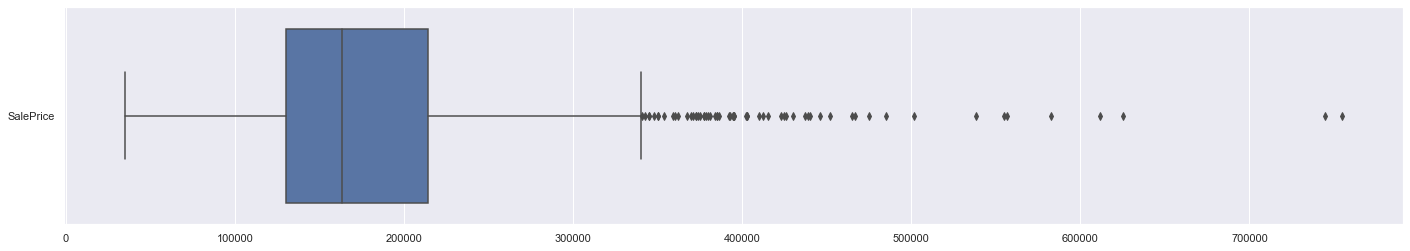

In [8]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = saleprice, orient = "h")

<AxesSubplot:ylabel='Count'>

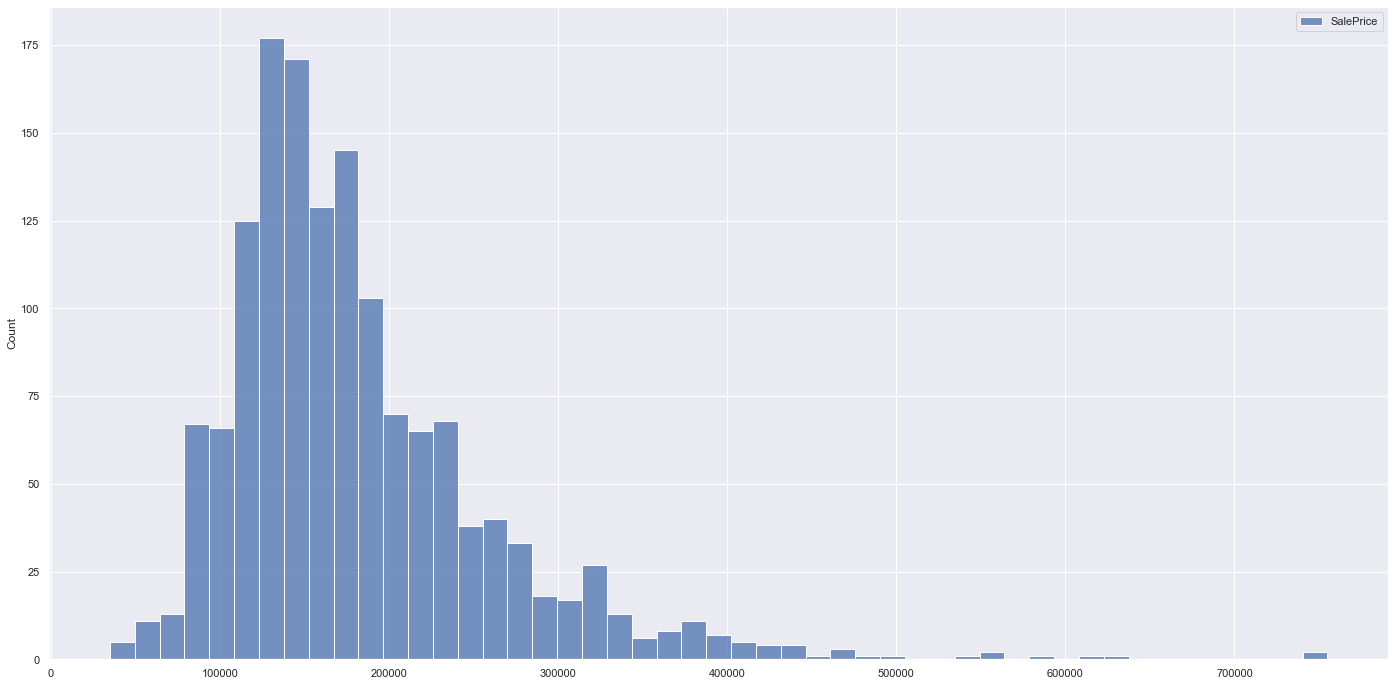

In [9]:
f = plt.figure(figsize=(24, 12))
sb.histplot(data = saleprice)

<AxesSubplot:>

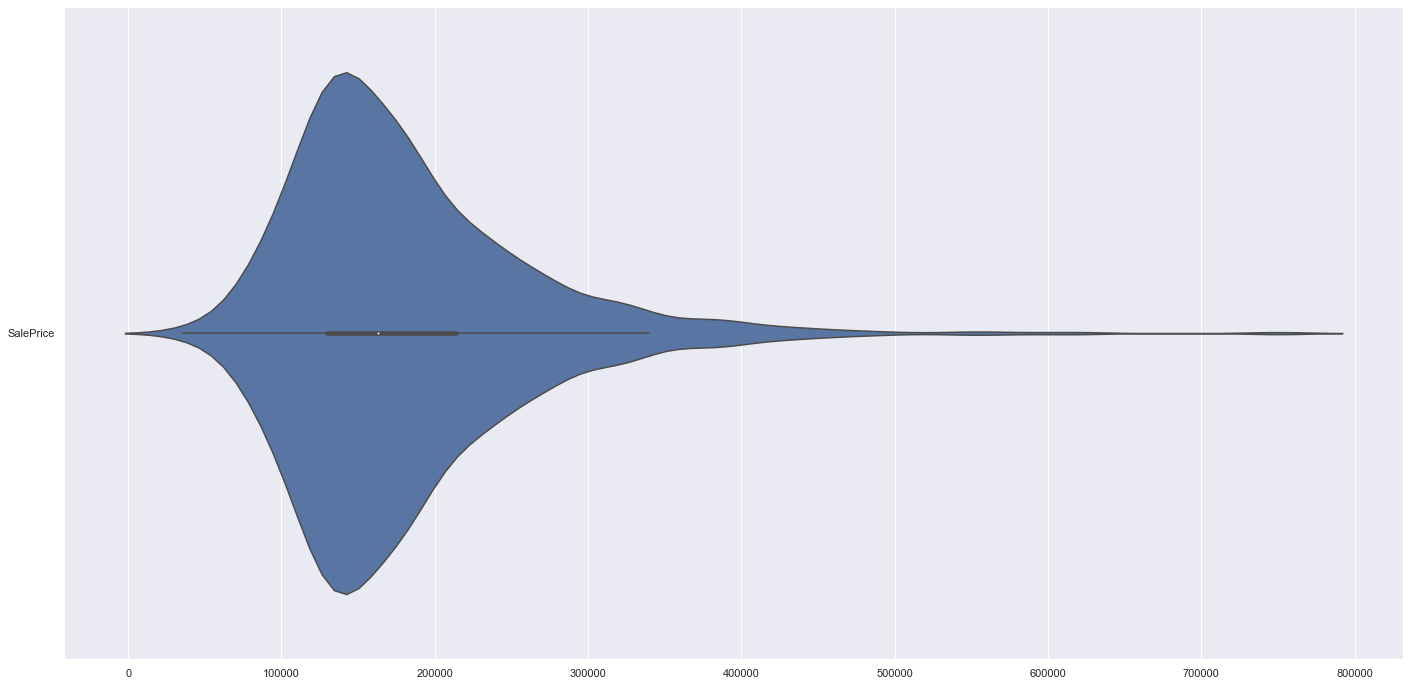

In [10]:
f = plt.figure(figsize=(24, 12))
sb.violinplot(data = saleprice, orient = "h")

Summary Statistics of `LotArea`, followed by Statistical Visualizations on the variable. 

In [11]:
lotarea = pd.DataFrame(houseDataNum['LotArea'])
print("Data type : ", type(lotarea))
print("Data dims : ", lotarea.size)
lotarea.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [12]:
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<AxesSubplot:>

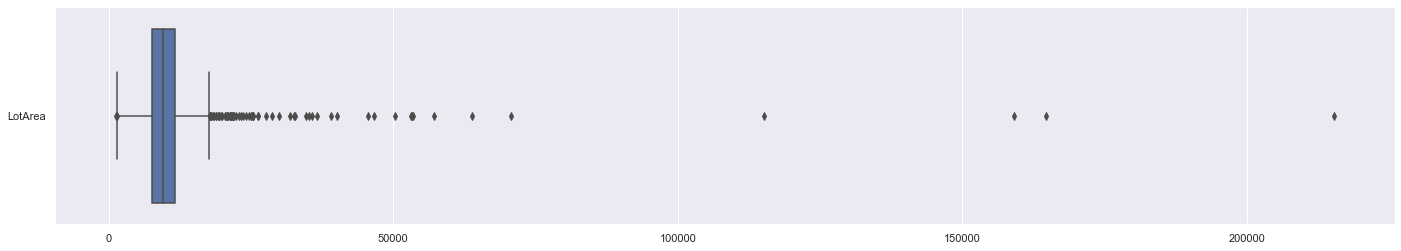

In [13]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = lotarea, orient = "h")

<AxesSubplot:ylabel='Count'>

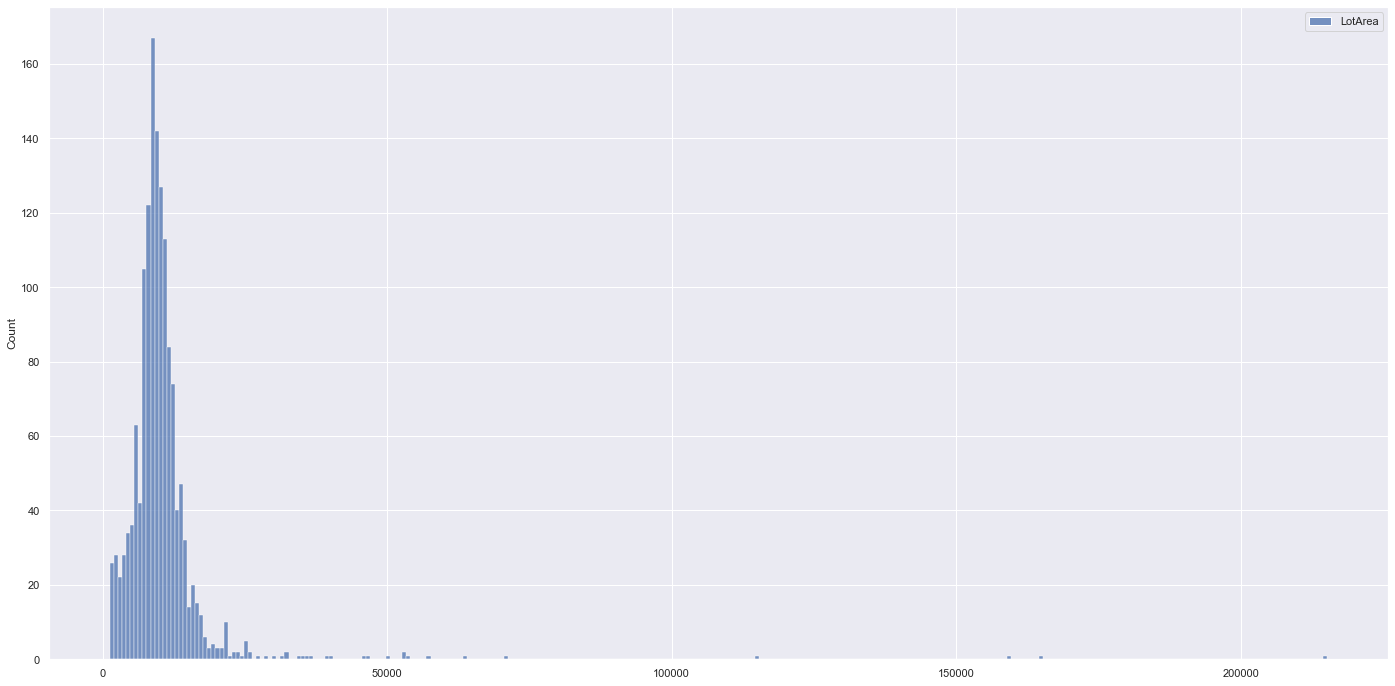

In [14]:
f = plt.figure(figsize=(24, 12))
sb.histplot(data = lotarea)

<AxesSubplot:>

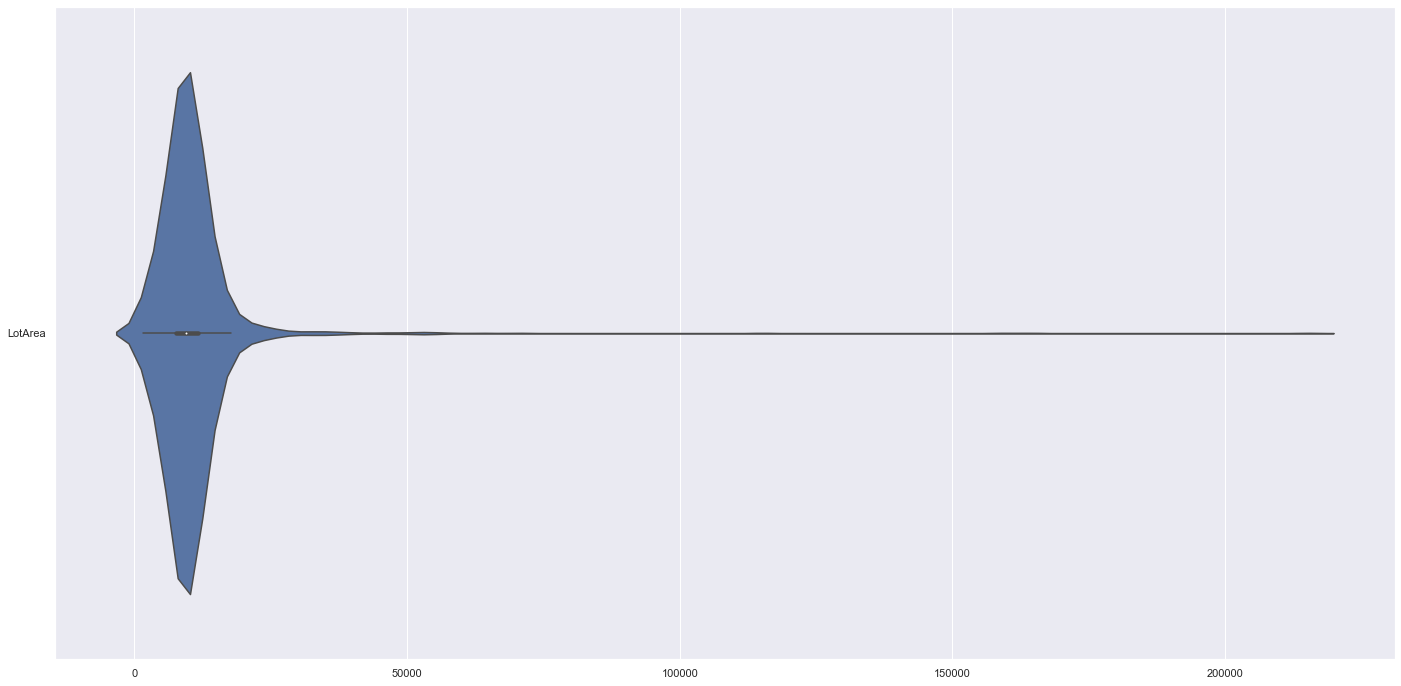

In [15]:
f = plt.figure(figsize=(24, 12))
sb.violinplot(data = lotarea, orient = "h")

### Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two

<AxesSubplot:>

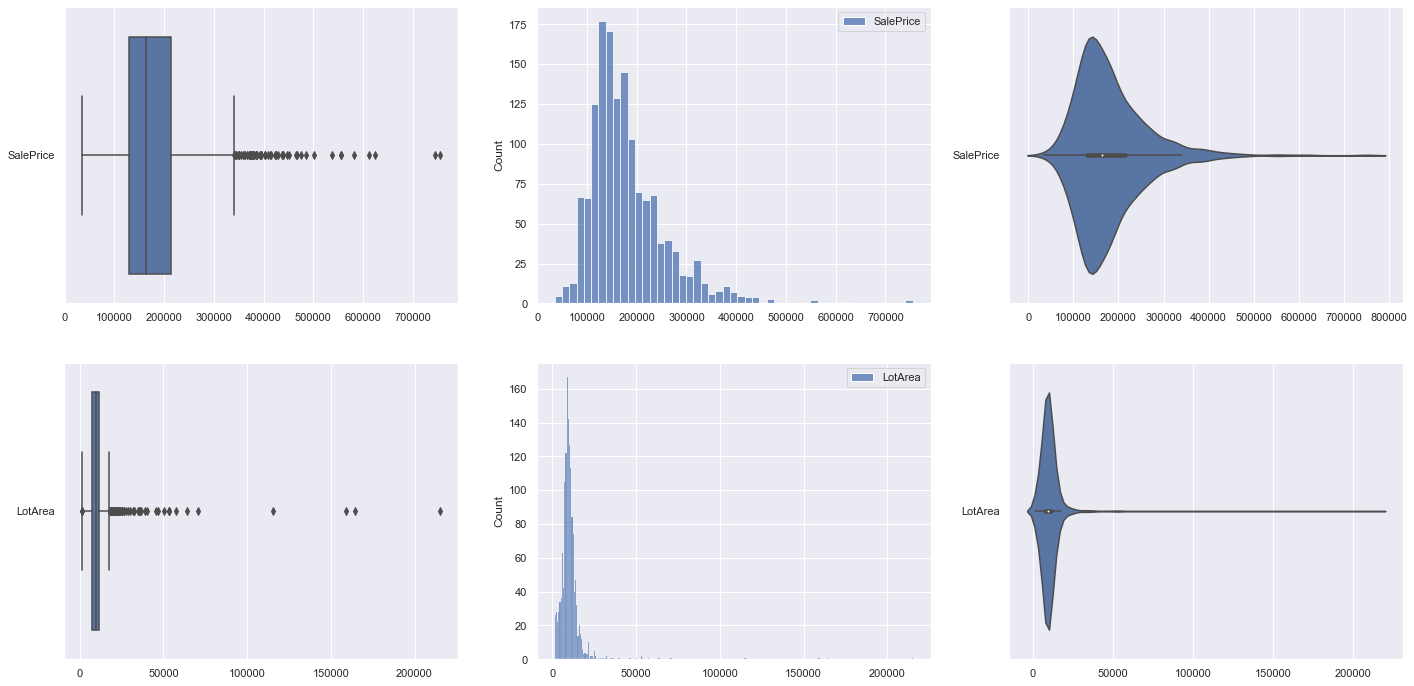

In [16]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(data = saleprice, orient = "h", ax = axes[0,0])
sb.histplot(data = saleprice, ax = axes[0,1])
sb.violinplot(data = saleprice, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for LotArea
sb.boxplot(data = lotarea, orient = "h", ax = axes[1,0])
sb.histplot(data = lotarea, ax = axes[1,1])
sb.violinplot(data = lotarea, orient = "h", ax = axes[1,2])

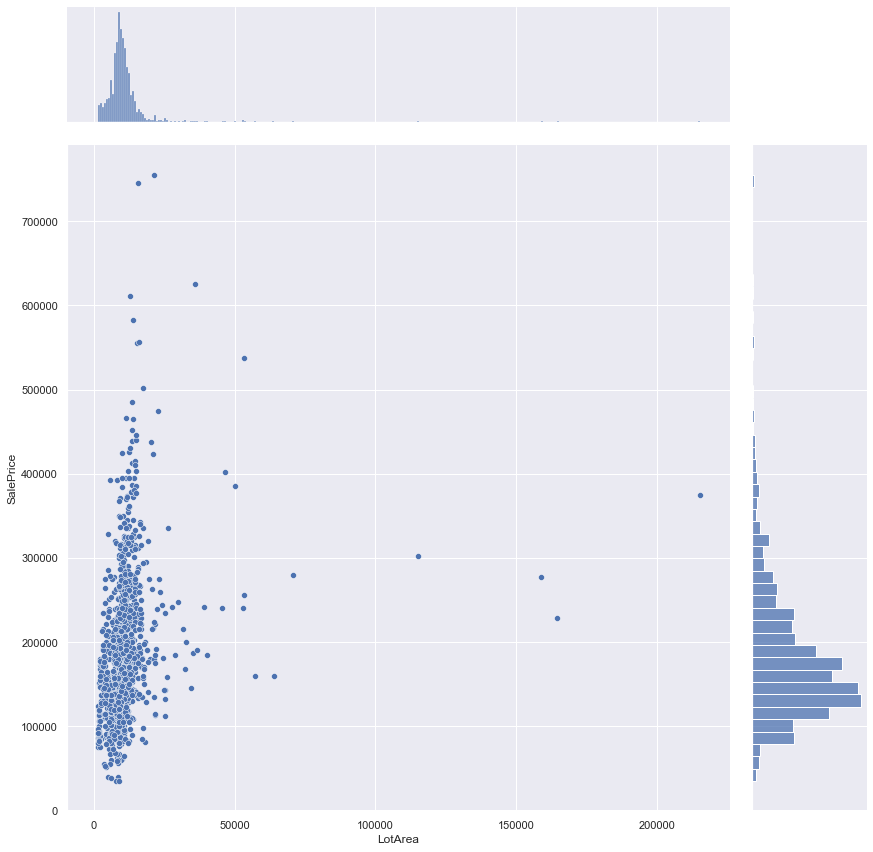

In [17]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotarea, saleprice], axis = 1).reindex(lotarea.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [18]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


<AxesSubplot:>

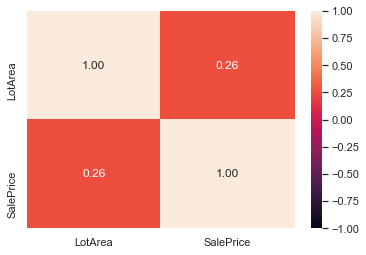

In [19]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Lab 3

##  Analysis of Numeric Variables

### Check the individual statistical description and visualize the statistical distributions of each of these variables.
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [20]:
houseNumData = pd.DataFrame(trndata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


### Check the Variables Independently

Summary Statistics of `houseNumData`, followed by Statistical Visualizations on the variables. 

In [21]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


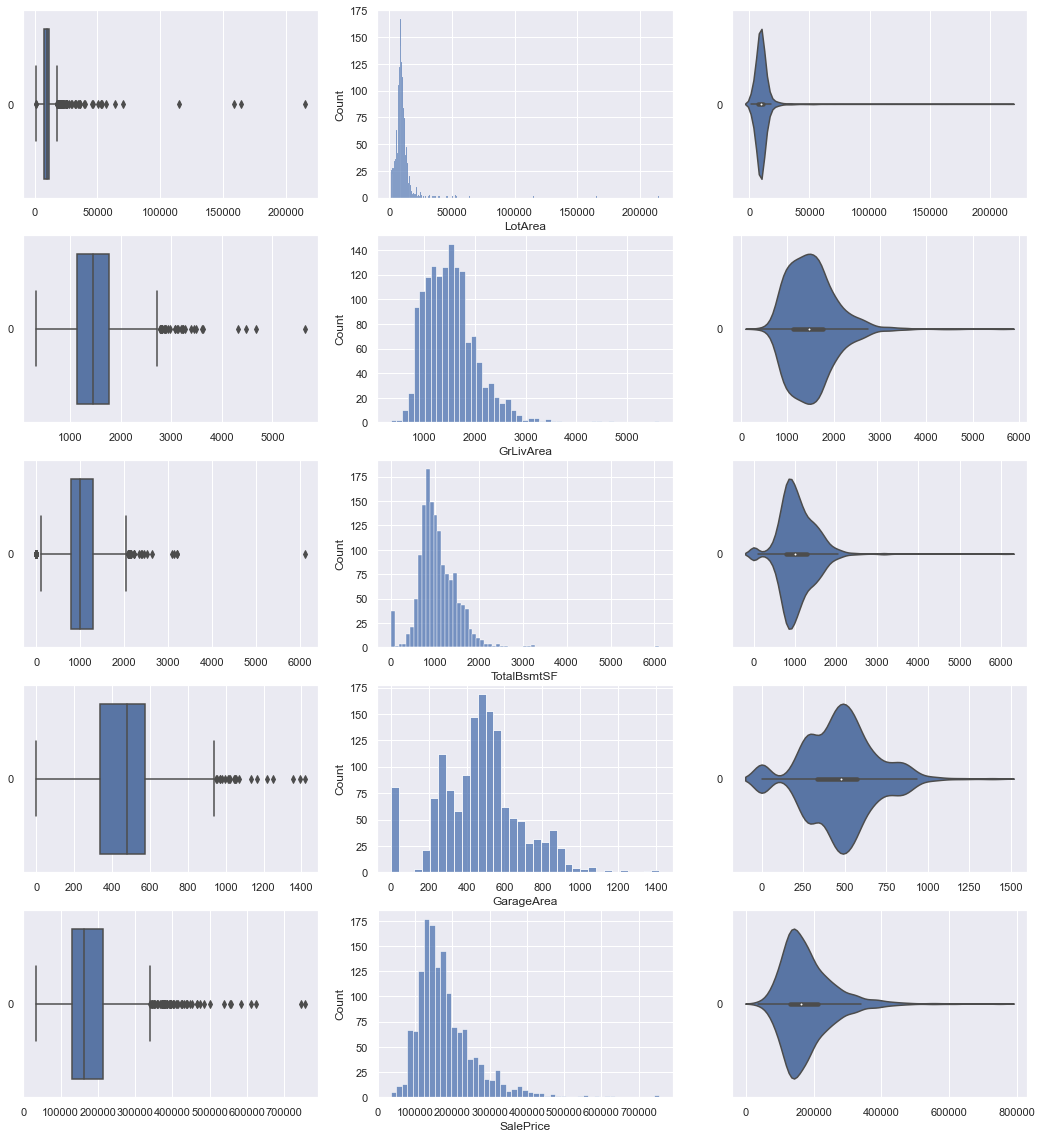

In [22]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 20))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

### Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the “skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?

In [23]:
skewHND = houseNumData.skew(axis =0)
print(skewHND)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64


The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.

Use the dataframe.skew() function to find skewness

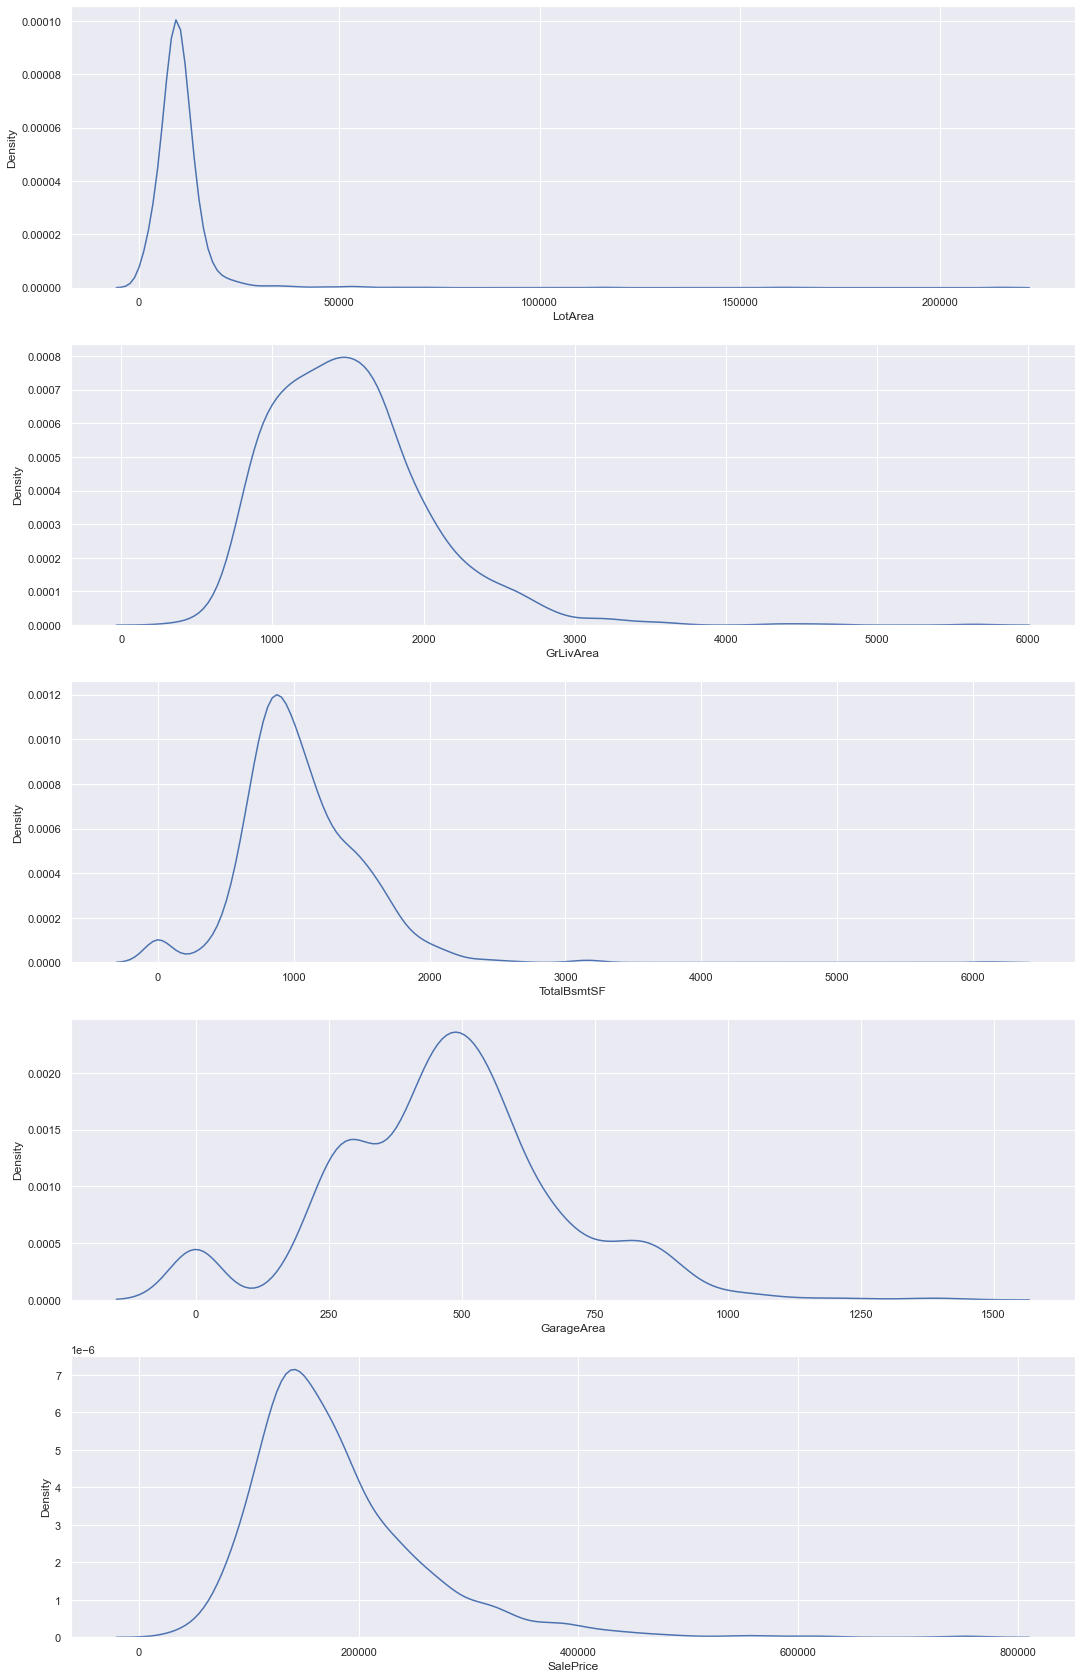

In [24]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 1, figsize=(18, 30))

count = 0
for var in houseNumData[0:1]:
    #f = plt.figure(figsize=(16, 10))
    sb.kdeplot(data = houseNumData[var],ax=axes[count])
    count += 1

In [25]:
# Calculate the quartiles
Q1 = houseNumData.quantile(0.25)
Q3 = houseNumData.quantile(0.75)

# Rule to identify outliers
rule = ((houseNumData < (Q1 - 1.5 * (Q3 - Q1))) | (houseNumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

Formula for the box-and-whiskers plot end-points to find the outliers.

### Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

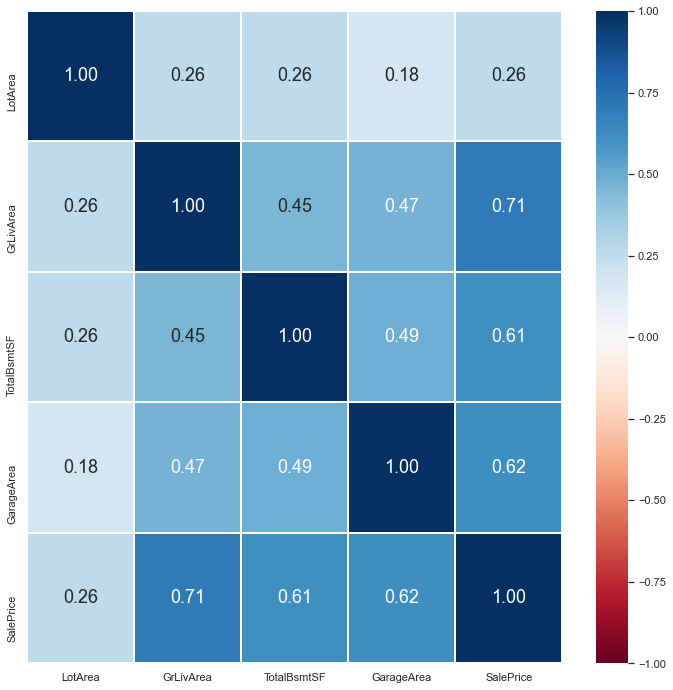

In [26]:
# Correlation Matrix
print(houseNumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

LotArea and SalePrice has the least correlation while GrLivArea and SalePrice has the most correlation. 
In general, most variables are relatively not correlated with a value of less than 0.5 

### Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

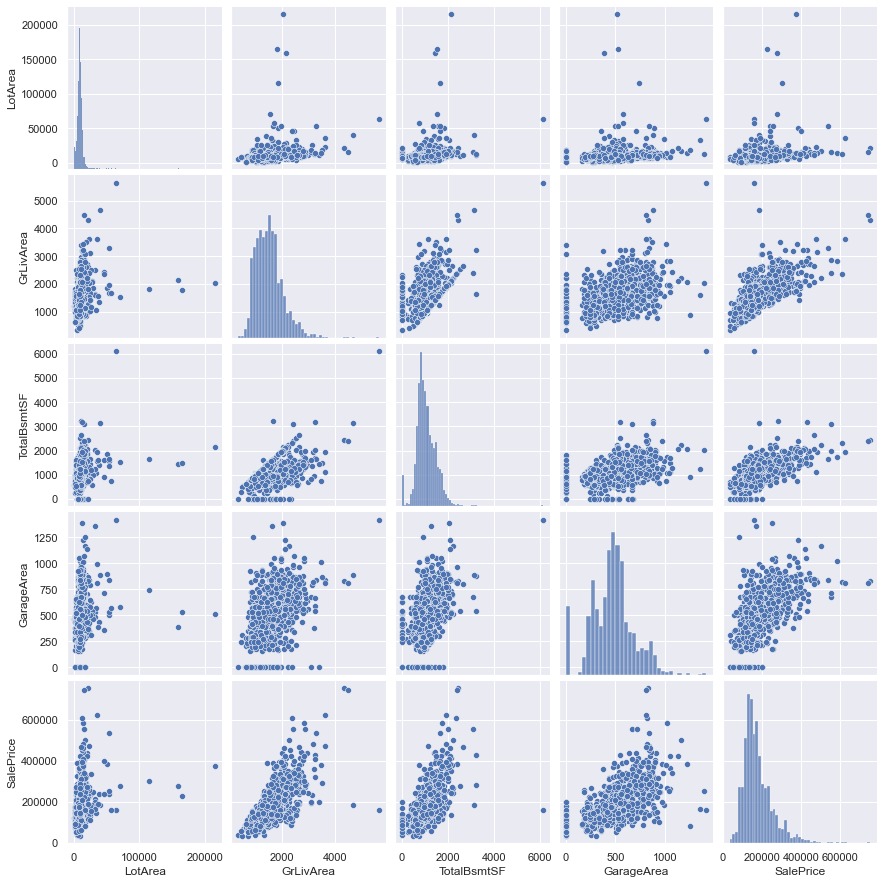

In [27]:
# Draw pairs of variables against one another
sb.pairplot(data = houseNumData)

**Observation : Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `GrLivArea` : Possibly the most important variable : Highest Correlation, Strong Linearity    
> `GarageArea` and `TotalBsmtSF` : Important variables : High Correlation, Strong Linearity    
> `LotArea` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

Bonus : Attempt a comprehensive analysis with all *Numeric* variables in the dataset.

## Analysis of Categorical Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`MSSubClass`, `Neighborhood`, `BldgType`, `OverallQual

In [125]:
houseCatData = pd.DataFrame(trndata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [126]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


Original dtype

In [123]:
## DONT DO THIS
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category').dtypes
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category').dtypes
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category').dtypes
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category').dtypes

In [31]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


Changing dtype to object

In [127]:
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')

In [128]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


Now all categorical data

### Check the Variables Independently

Summary Statistics of `houseCatData`, followed by Statistical Visualizations on the variables. 

In [129]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


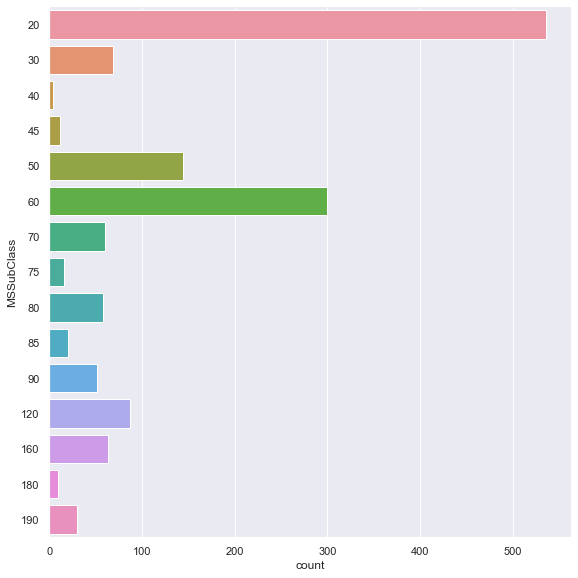

In [130]:
sb.catplot(y = 'MSSubClass', data = houseCatData, kind = "count", height = 8)

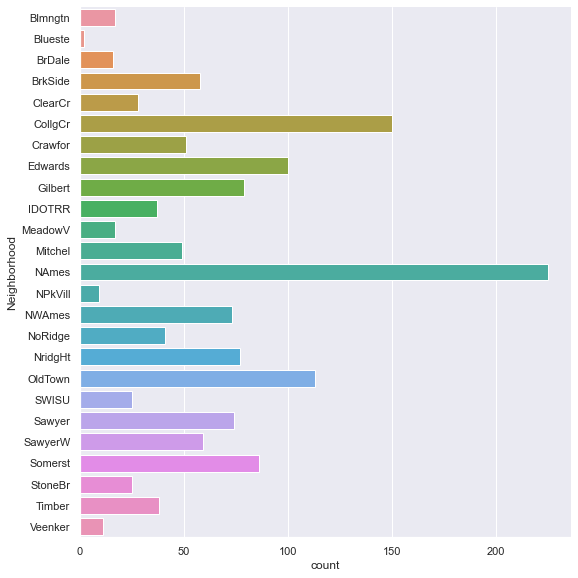

In [131]:
sb.catplot(y = 'Neighborhood', data = houseCatData, kind = "count", height = 8)

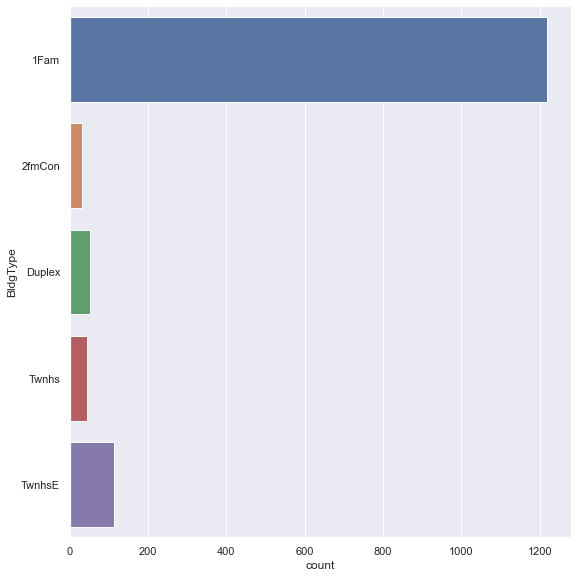

In [132]:
sb.catplot(y = 'BldgType', data = houseCatData, kind = "count", height = 8)

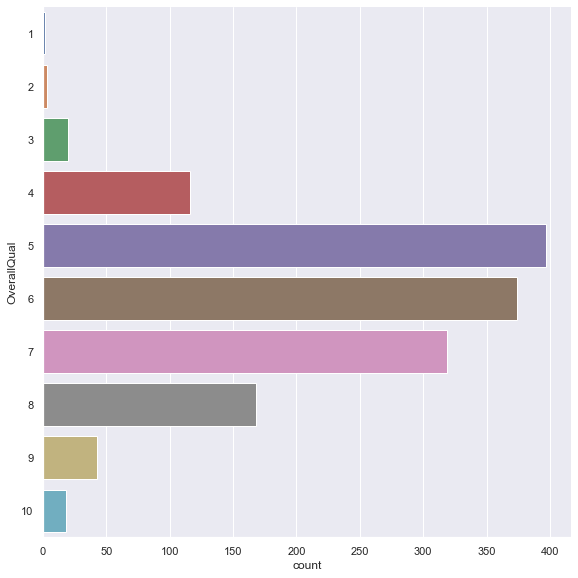

In [133]:
sb.catplot(y = 'OverallQual', data = houseCatData, kind = "count", height = 8)

### Check the relation amongst two categorical variables through the bi-variate joint heatmap of counts. Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.

<AxesSubplot:xlabel='MSSubClass', ylabel='OverallQual'>

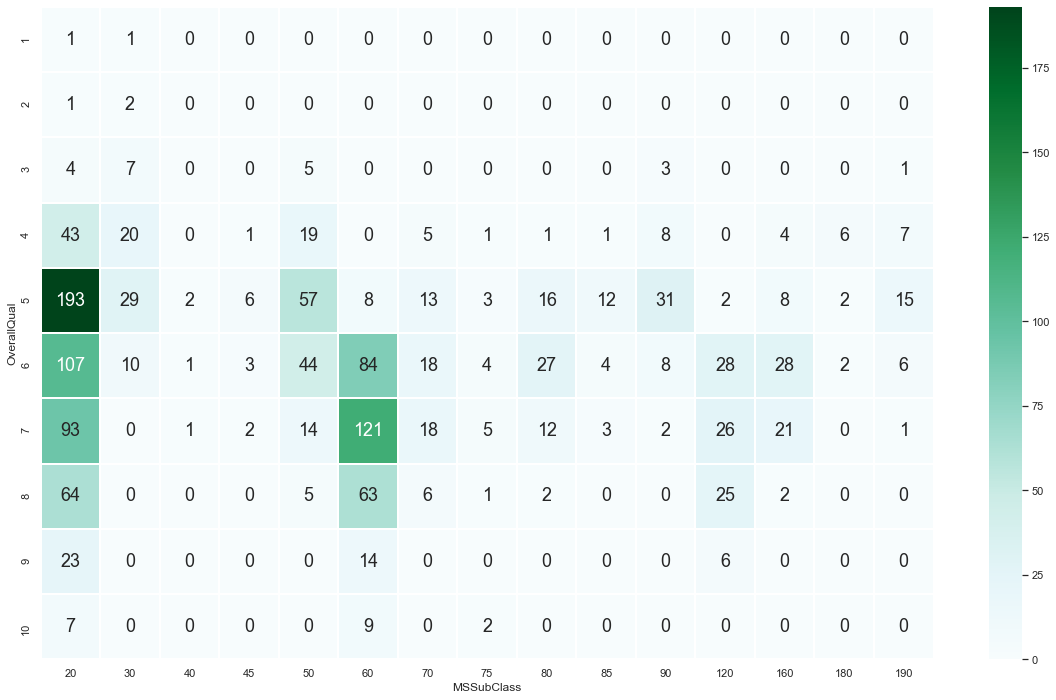

In [134]:
# Distribution of OverallQual across MSSubClass
f = plt.figure(figsize=(20, 12))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Neighborhood', ylabel='OverallQual'>

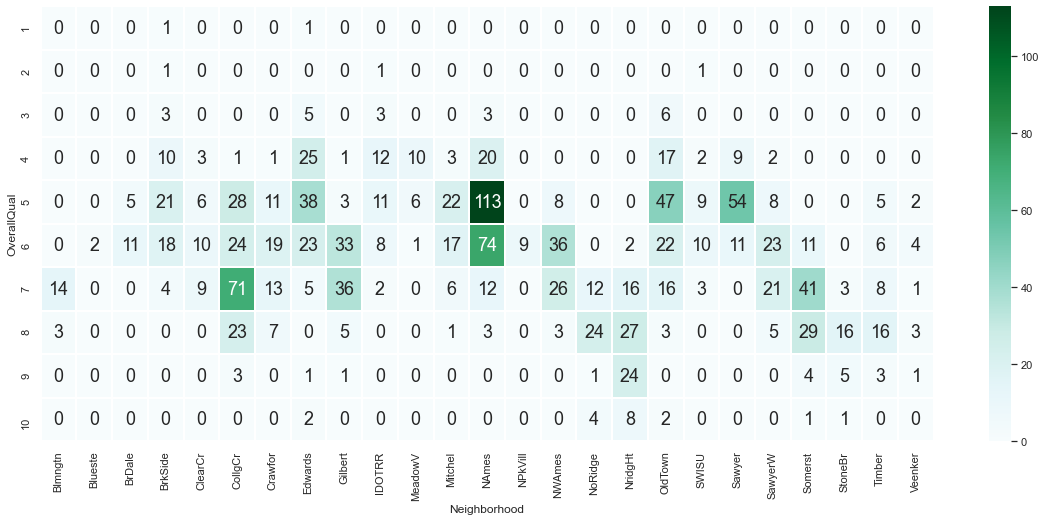

In [135]:
# Distribution of OverallQual across Neighborhood
f = plt.figure(figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

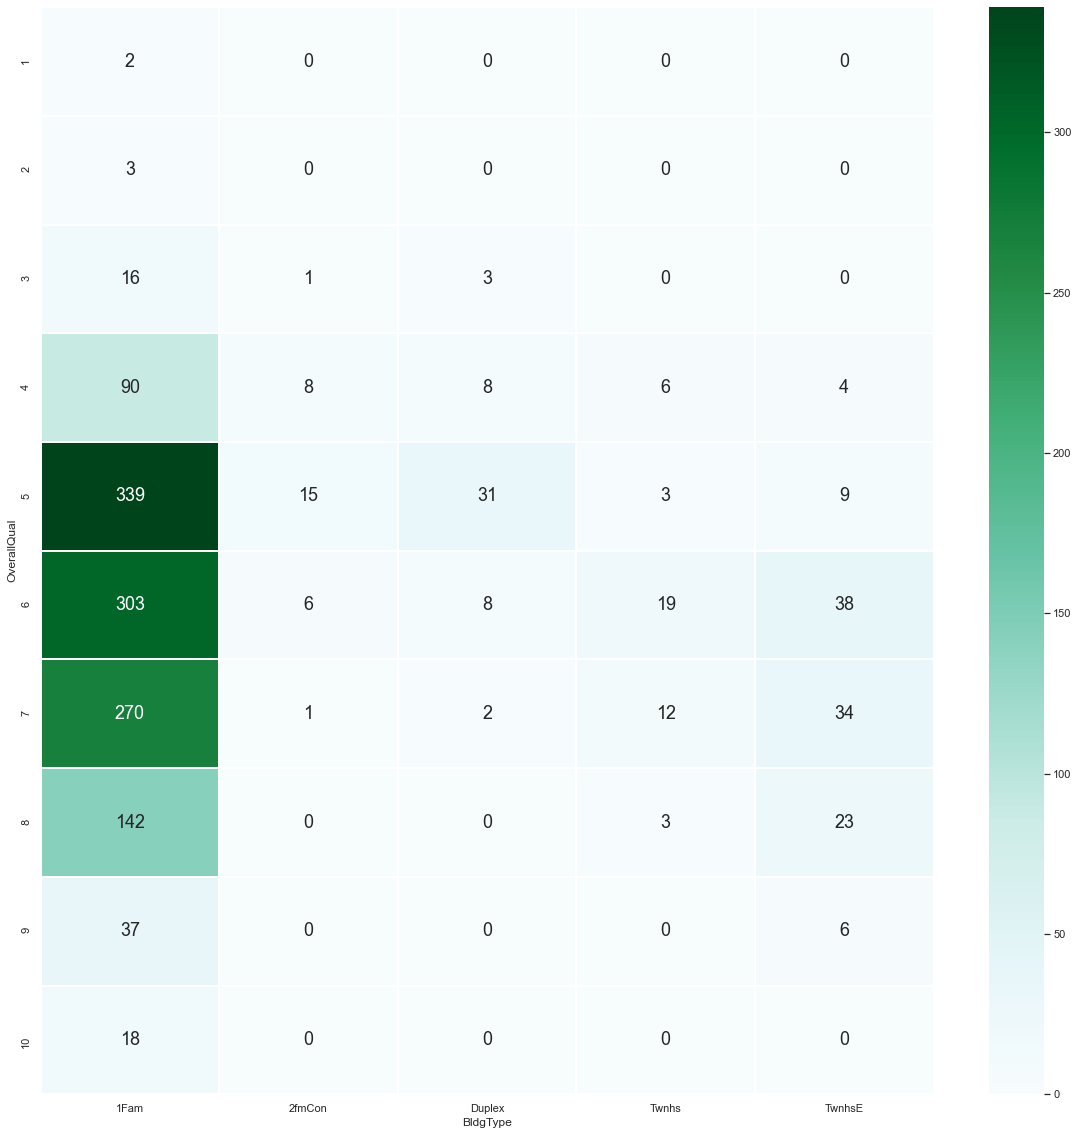

In [136]:
# Distribution of OverallQual across BldgType
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
Comment on which of these variables has the most influence in predicting “SalePrice”

Create a joint DataFrame by concatenating `SalePrice` to `houseCatData`.   

In [137]:
saleprice = pd.DataFrame(trndata['SalePrice'])
houseCatSale = pd.concat([houseCatData, saleprice], sort = False, axis = 1).reindex(index=houseCatData.index)
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

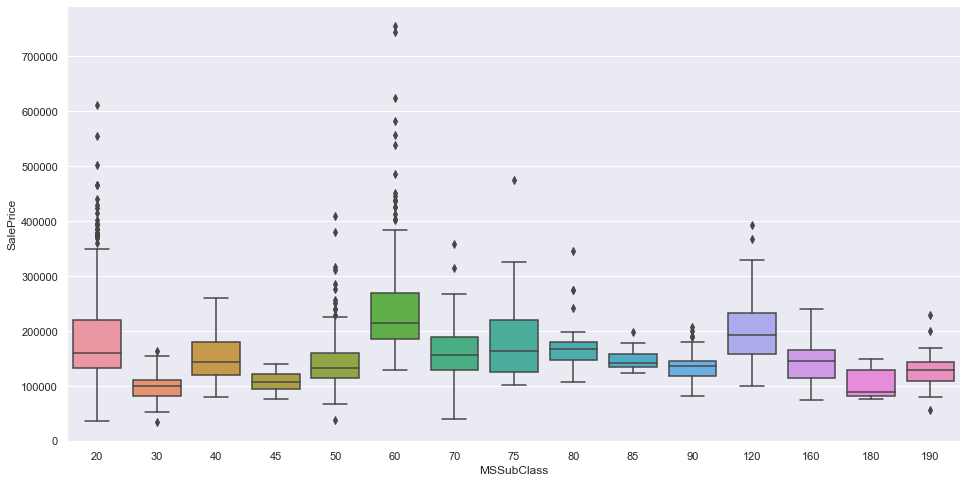

In [138]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

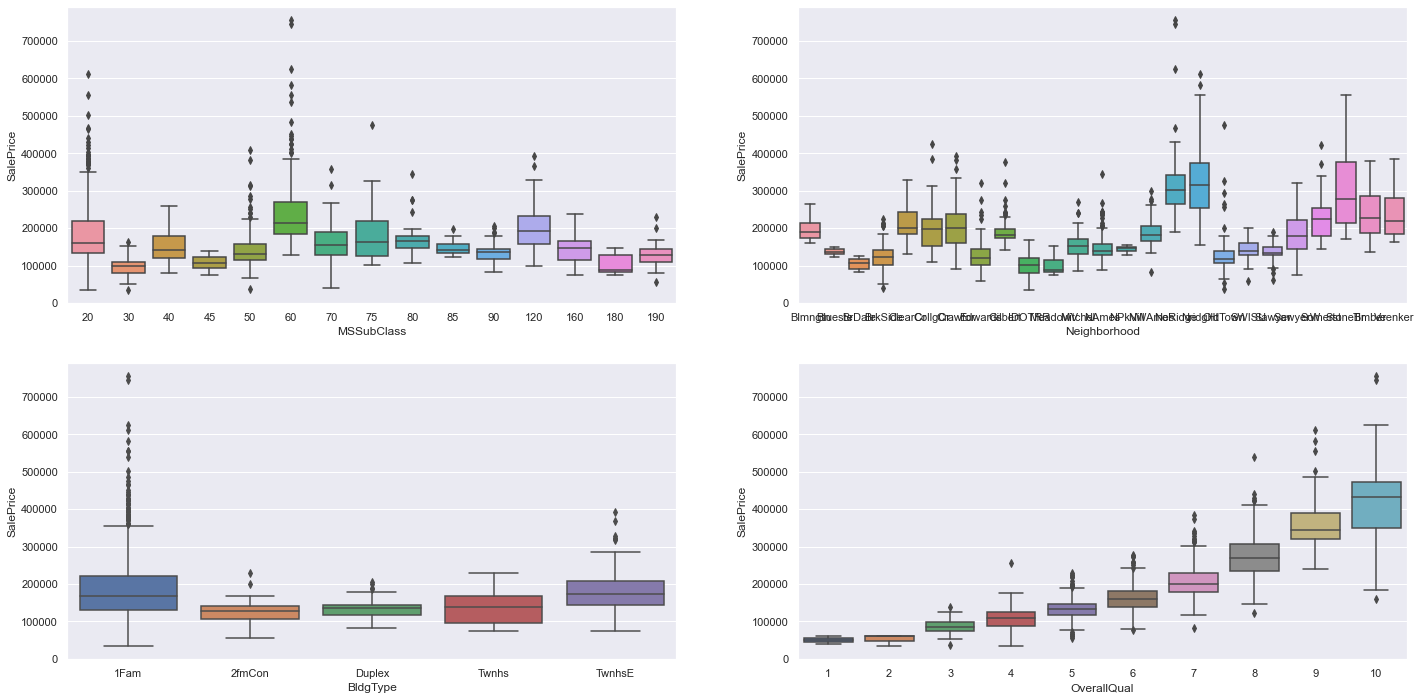

In [139]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale, ax = axes[0,0])
sb.boxplot(x = 'Neighborhood', y = 'SalePrice',data = houseCatSale, ax = axes[0,1])


# Plot the basic uni-variate figures for LotArea
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale, ax = axes[1,0])
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale, ax = axes[1,1])

#### Can't see neighbourhood graph properly so print again

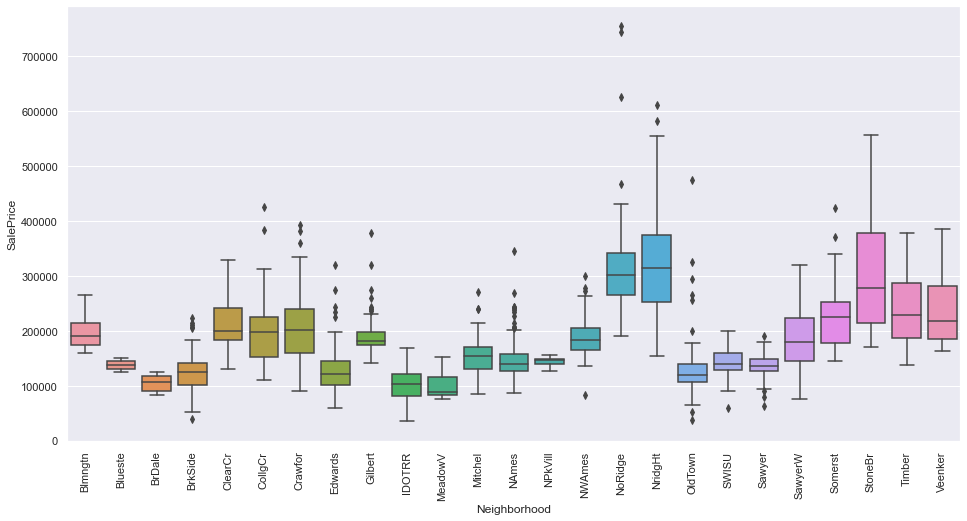

In [140]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)
plt.xticks(rotation=90);

**Observation : Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   

## Lab 4

### Problem 1 : Predicting SalePrice using GrLivArea

Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship

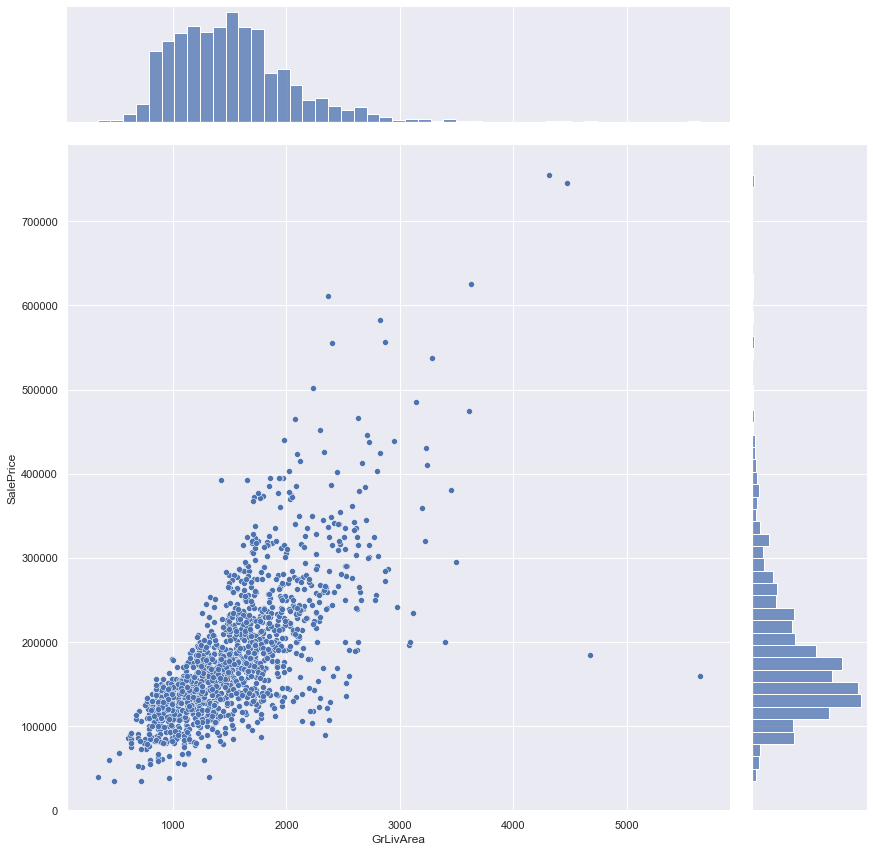

In [46]:
sb.jointplot(data = trndata, x = "GrLivArea", y = "SalePrice", height = 12)

### Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [47]:
# Prof's way of finding corr data
trndata.SalePrice.corr(trndata.GrLivArea)

0.7086244776126522

In [48]:
# my way
SP = pd.DataFrame(trndata['SalePrice'])  
GLA = pd.DataFrame(trndata['GrLivArea']) 

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([GLA, SP], axis = 1).reindex(GLA.index)
jointDF

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [49]:
# Calculate the correlation between the two columns/variables
jointDF.corr()


,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


<AxesSubplot:>

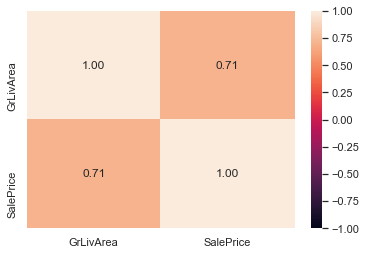

In [50]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression
Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [51]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()


#### if partition is not random 

In [52]:
# Train Set : 600 samples
sp_train = pd.DataFrame(SP[:1100])
gla_train = pd.DataFrame(GLA[:1100])

# Test Set : 200 samples
sp_test = pd.DataFrame(SP[-360:])
gla_test = pd.DataFrame(GLA[-360:])

# Check the sample sizes
print("Train Set :", sp_train.shape, gla_train.shape)
print("Test Set  :", sp_test.shape, gla_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


#### if random data sets

In [53]:
# Split the Dataset into Train and Test
sp_train, sp_test, gla_train, gla_test = train_test_split(SP, GLA, test_size = 0.246)


# Check the sample sizes
print("Train Set :", sp_train.shape, gla_train.shape)
print("Test Set  :", sp_test.shape, gla_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea

In [54]:
# Train the Linear Regression model
linreg.fit(sp_train, gla_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [55]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [673.22933114]
Coefficients 	: a =  [[0.00464797]]


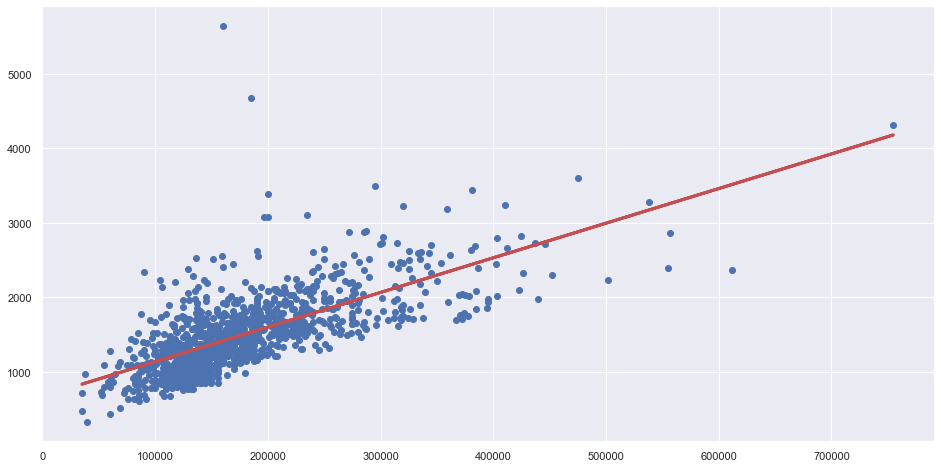

In [56]:
# Formula for the Regression line
regline_x = sp_train
regline_y = linreg.intercept_ + linreg.coef_ * sp_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_train, gla_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Predicting the GLA points

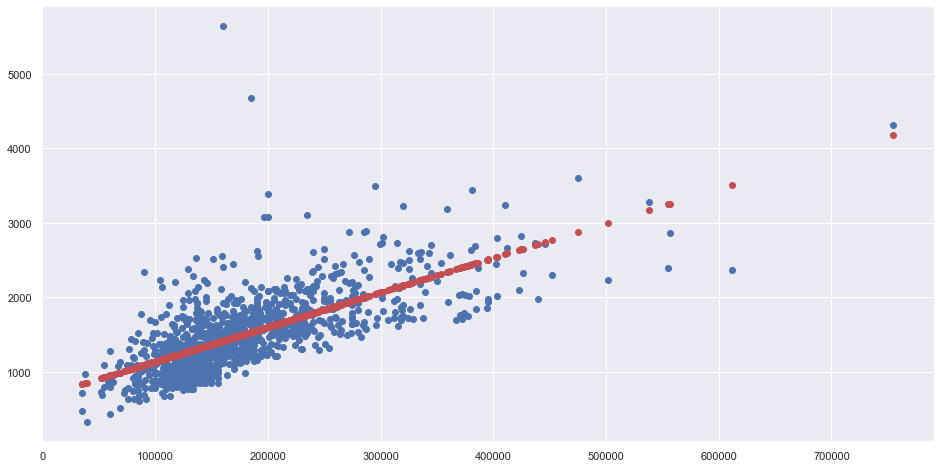

In [57]:
# Predict Total values corresponding to HP Train
gla_train_pred = linreg.predict(sp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_train, gla_train)
plt.scatter(sp_train, gla_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [58]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_train, gla_train))
r2_gla1 = linreg.score(sp_train, gla_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mseG = mean_sq_err(gla_train, gla_train_pred)
print("Mean Squared Error (MSE) \t:", mseG)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseG))

Explained Variance (R^2) 	: 0.4751711805464365
Mean Squared Error (MSE) 	: 141152.08350973556
Root Mean Squared Error (RMSE) 	: 375.70212071498287


### Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

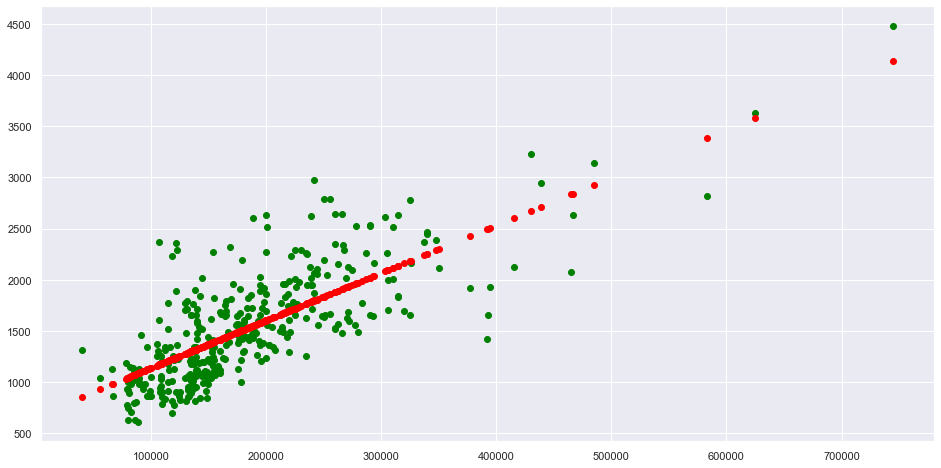

In [59]:
# Predict Total values corresponding to HP Test
gla_test_pred = linreg.predict(sp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_test, gla_test, color = "green")
plt.scatter(sp_test, gla_test_pred, color = "red")
plt.show()

In [60]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_test, gla_test))
r2_gla2 = linreg.score(sp_test, gla_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseG2 = mean_sq_err(gla_test, gla_test_pred)
print("Mean Squared Error (MSE) \t:", mseG2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseG2))

Explained Variance (R^2) 	: 0.574978774102409
Mean Squared Error (MSE) 	: 125889.99231780838
Root Mean Squared Error (RMSE) 	: 354.8097973813694


---

## Problem 2 
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” oneby-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

In [61]:
# Datasets
LA = pd.DataFrame(trndata['LotArea'])
TBSF = pd.DataFrame(trndata['TotalBsmtSF'])
GA = pd.DataFrame(trndata['GarageArea'])

In [62]:
# Split the Dataset into Train and Test
sp_train, sp_test, la_train, la_test = train_test_split(SP, LA, test_size = 0.246)
sp_train, sp_test, tbsf_train, tbsf_test = train_test_split(SP, TBSF, test_size = 0.246)
sp_train, sp_test, ga_train, ga_test = train_test_split(SP, GA, test_size = 0.246)


# Check the sample sizes
print("Train Set :", la_train.shape, tbsf_train.shape, ga_train.shape)
print("Test Set  :", la_test.shape, tbsf_test.shape, ga_test.shape)

Train Set : (1100, 1) (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1) (360, 1)


### LA

In [63]:
# Train the Linear Regression model
linreg.fit(sp_train, la_train)

LinearRegression()

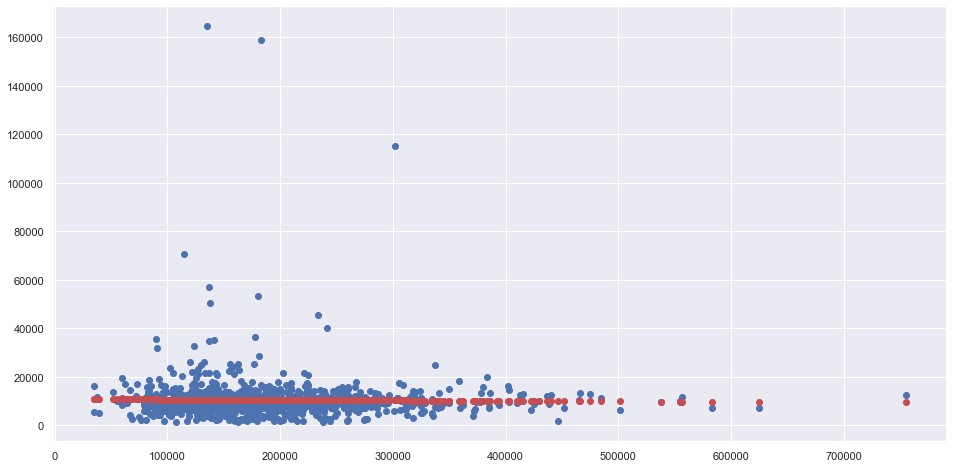

In [64]:
# Predict LA values corresponding to SP Train
la_train_pred = linreg.predict(sp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_train, la_train)
plt.scatter(sp_train, la_train_pred, color = "r")
plt.show()

In [65]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_train, la_train))
r2_la1 = linreg.score(sp_train, la_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mseL = mean_sq_err(la_train, la_train_pred)
print("Mean Squared Error (MSE) \t:", mseL)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseL))

Explained Variance (R^2) 	: 0.0002684723588064486
Mean Squared Error (MSE) 	: 80704094.47251654
Root Mean Squared Error (RMSE) 	: 8983.545762810836


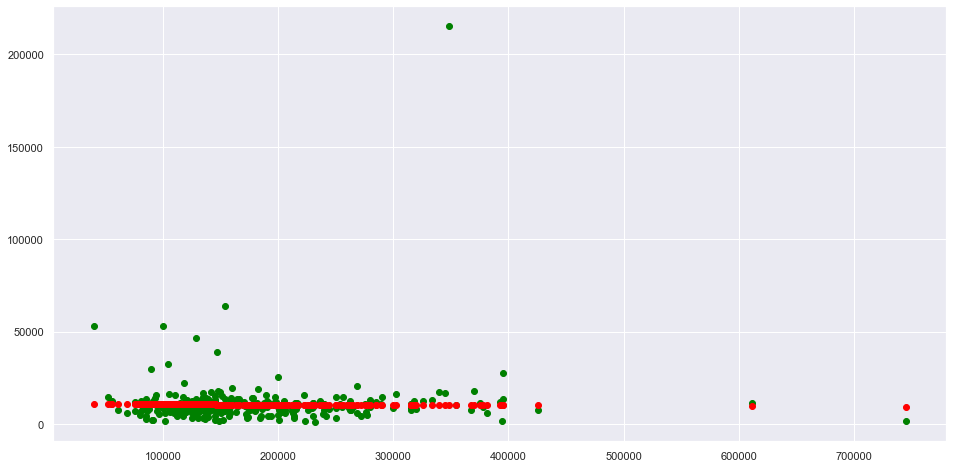

In [66]:
# Predict Total values corresponding to HP Test
la_test_pred = linreg.predict(sp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_test, la_test, color = "green")
plt.scatter(sp_test, la_test_pred, color = "red")
plt.show()

In [67]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_test, la_test))
r2_la2 = linreg.score(sp_test, la_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseL2 = mean_sq_err(la_test, la_test_pred)
print("Mean Squared Error (MSE) \t:", mseL2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseL2))

Explained Variance (R^2) 	: -0.002365303633942162
Mean Squared Error (MSE) 	: 157410604.5652063
Root Mean Squared Error (RMSE) 	: 12546.33829311191


### TBSF

In [68]:
linreg.fit(sp_train, tbsf_train)

LinearRegression()

In [69]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [1011.70940549]
Coefficients 	: a =  [[0.00023479]]


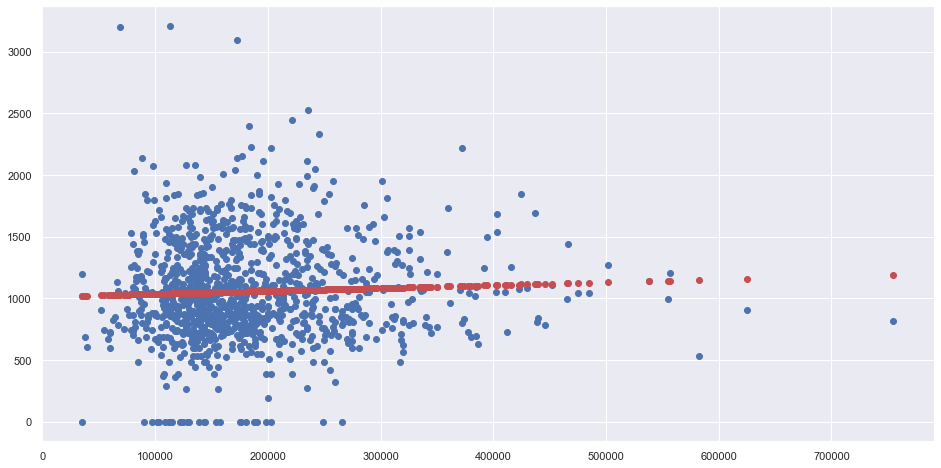

In [70]:
# Predict LA values corresponding to SP Train
tbsf_train_pred = linreg.predict(sp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_train, tbsf_train)
plt.scatter(sp_train, tbsf_train_pred, color = "r")
plt.show()

In [71]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_train, tbsf_train))
r2_tbsf1 = linreg.score(sp_train, tbsf_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mseT = mean_sq_err(tbsf_train, tbsf_train_pred)
print("Mean Squared Error (MSE) \t:", mseT)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseT))

Explained Variance (R^2) 	: 0.001995602278438535
Mean Squared Error (MSE) 	: 173664.24460562182
Root Mean Squared Error (RMSE) 	: 416.7304219823912


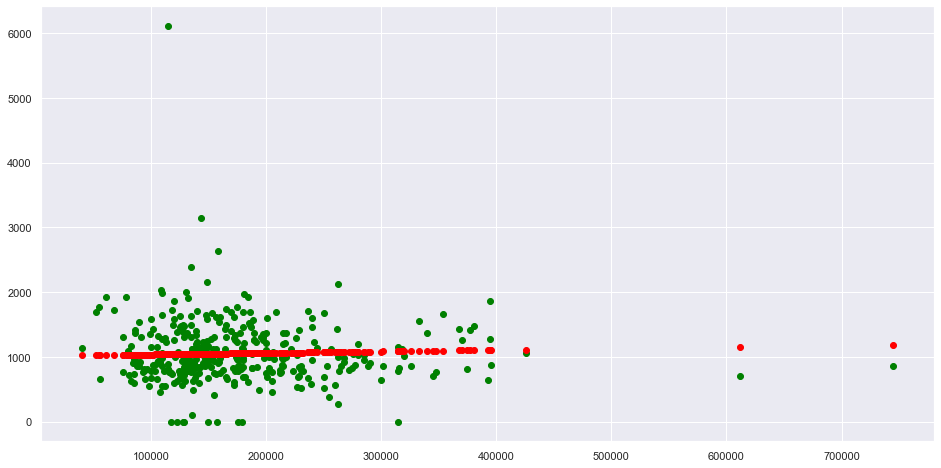

In [72]:
# Predict Total values corresponding to HP Test
tbsf_test_pred = linreg.predict(sp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_test, tbsf_test, color = "green")
plt.scatter(sp_test, tbsf_test_pred, color = "red")
plt.show()

In [73]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_test, tbsf_test))
r2_tbsf2 = linreg.score(sp_test, tbsf_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseT2 = mean_sq_err(tbsf_test, tbsf_test_pred)
print("Mean Squared Error (MSE) \t:", mseT2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseT2))

Explained Variance (R^2) 	: -0.006319971073698305
Mean Squared Error (MSE) 	: 249777.8103609684
Root Mean Squared Error (RMSE) 	: 499.7777609707823


## GA

In [74]:
linreg.fit(sp_train, ga_train)

LinearRegression()

In [75]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [160.74693426]
Coefficients 	: a =  [[0.00171839]]


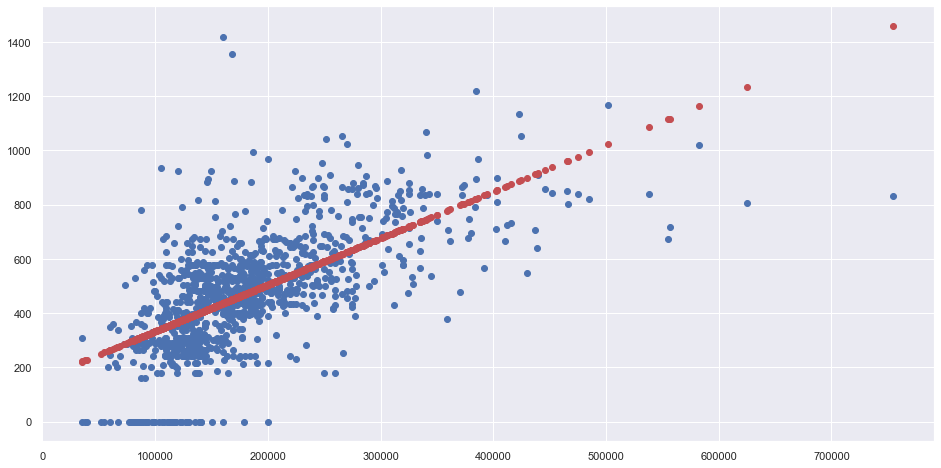

In [76]:
# Predict LA values corresponding to SP Train
ga_train_pred = linreg.predict(sp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_train, ga_train)
plt.scatter(sp_train, ga_train_pred, color = "r")
plt.show()

In [77]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_train, ga_train))
r2_ga1 = linreg.score(sp_train, ga_train)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mseGa = mean_sq_err(ga_train, ga_train_pred)
print("Mean Squared Error (MSE) \t:", mseGa)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseGa))

Explained Variance (R^2) 	: 0.41586987574002965
Mean Squared Error (MSE) 	: 26127.55483149249
Root Mean Squared Error (RMSE) 	: 161.64020178004137


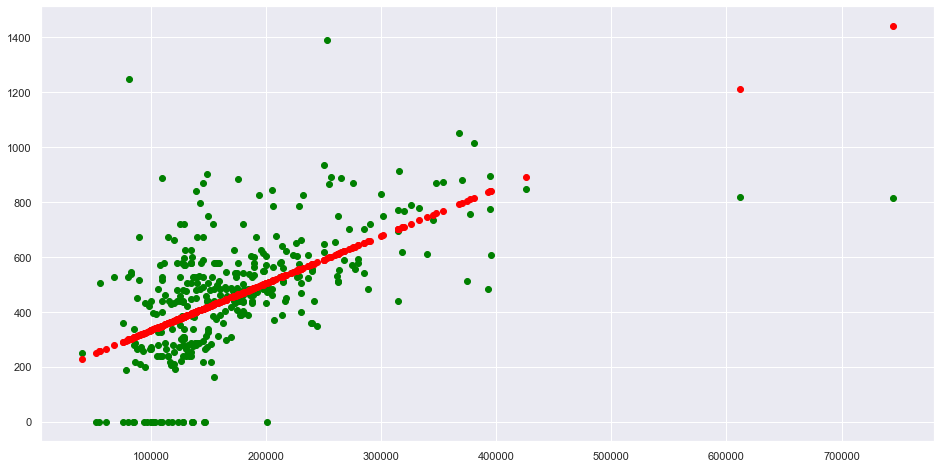

In [78]:
# Predict Total values corresponding to HP Test
ga_test_pred = linreg.predict(sp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(sp_test, ga_test, color = "green")
plt.scatter(sp_test, ga_test_pred, color = "red")
plt.show()

In [79]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sp_test, ga_test))
r2_ga2 = linreg.score(sp_test, ga_test)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseGa2 = mean_sq_err(ga_test, ga_test_pred)
print("Mean Squared Error (MSE) \t:", mseGa2)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseGa2))

Explained Variance (R^2) 	: 0.3104388882674709
Mean Squared Error (MSE) 	: 33472.33602053146
Root Mean Squared Error (RMSE) 	: 182.9544643361606


---
### Problem 3
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

In [80]:
# matrix of r2 and mse
print("    ","GrLivArea","    ", "LotArea", "     ","TotalBsmtSF", "  ","GarageArea")
comp = np.array([[r2_gla1, r2_la1, r2_tbsf1, r2_ga1], [r2_gla2, r2_la2, r2_tbsf2, r2_ga2], [mseG, mseL, mseT, mseGa], [mseG2, mseL2, mseT2, mseGa2]])
print(comp)

     GrLivArea      LotArea       TotalBsmtSF    GarageArea
[[ 4.75171181e-01  2.68472359e-04  1.99560228e-03  4.15869876e-01]
 [ 5.74978774e-01 -2.36530363e-03 -6.31997107e-03  3.10438888e-01]
 [ 1.41152084e+05  8.07040945e+07  1.73664245e+05  2.61275548e+04]
 [ 1.25889992e+05  1.57410605e+08  2.49777810e+05  3.34723360e+04]]


From the matrix, it is clear to see that GrLivArea has the highest train and a relatively high test data variance. However, GarageArea has the lowest MSE, which implies that the predicted data is the closest to the test data and as the MSE reduction from GarageArea to GrLivArea is more than the higher Variance, GarageArea would be the most accurate to predict values.  

Compare and contrast the four models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SalePrice` vs `GrLivArea` has the best Explained Variance (R^2) out of the four models.   
* `SalePrice` vs `LotArea` has the worst Explained Variance (R^2) out of the four models.   
* Naturally, the model with `GrLivArea` is the best one in terms of just the Training accuracy.    


* We also find `SalePrice` vs `GrLivArea` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `SalePrice` vs `LotArea` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `GrLivArea` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `GrLivArea` is the best amongst the four in predicting `SalePrice`.      

**Did you notice?** : Go back and check again the R^2 and MSE values for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of R^2 and MSE values. If that is so, can we *really* be confident that `GrLivArea` will always be the best variable to predict `SalePrice`? Think about it. ;-)

---

### Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.  

---

### Multi-Variate Linear Regression

Let us set up another Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $a_4$ $\times$ Sp. Atk + $a_5$ $\times$ Sp. Def + $a_6$ $\times$ Speed + $b$  

In [81]:
# Extract Response and Predictors
y = pd.DataFrame(trndata['SalePrice'])
X = pd.DataFrame(trndata[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (1100, 4) (1100, 1)
Test Set  : (360, 4) (360, 1)


LinearRegression()

In [82]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-41123.42565426]
Coefficients 	: a =  [[ 69.08961408   0.341517    61.46961045 101.77111556]]


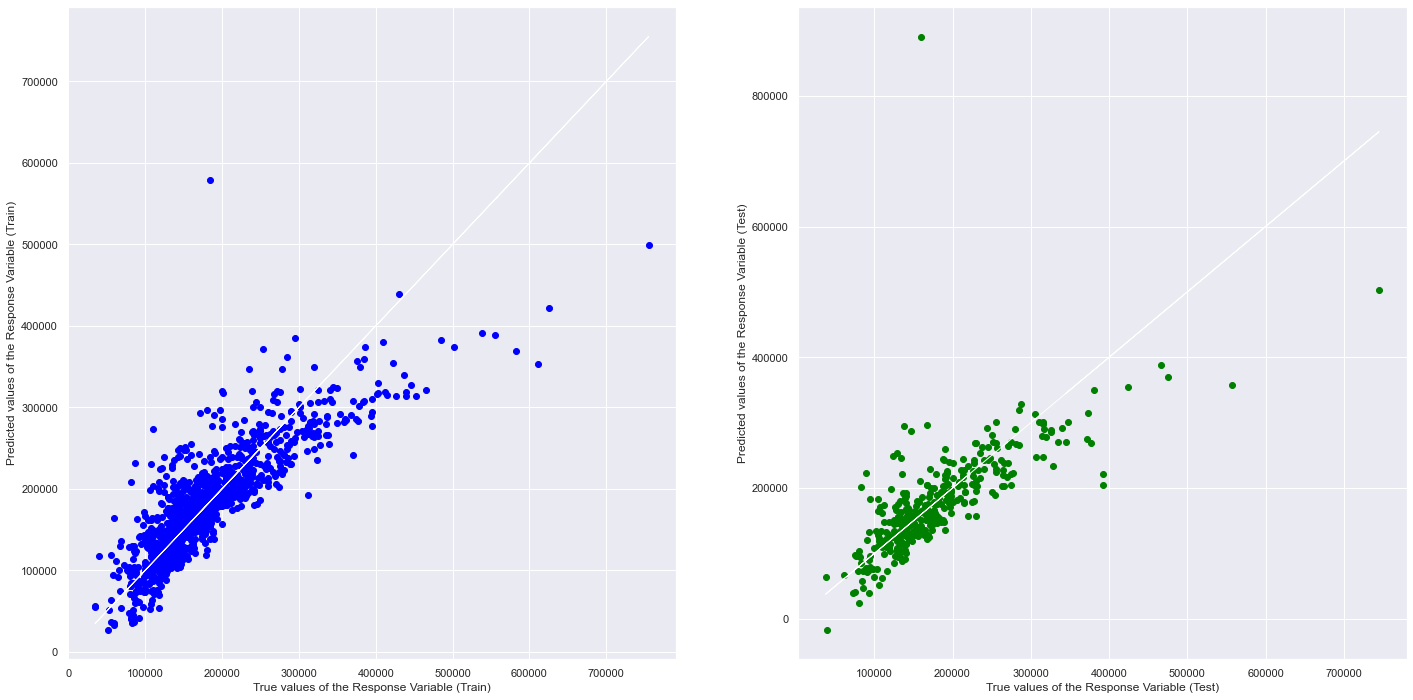

In [83]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [84]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.7173728596876094
Mean Squared Error (MSE) on Train Set 	: 1793212944.7354295
Mean Squared Error (MSE) on Test Set 	: 3313986454.0692043


## Lab 5

Problem 1 : Predicting CentralAir using SalePrice. 

Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

In [85]:
trndata['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

Check the `catplot` for `CentralAir`, to visually understand the distribution.

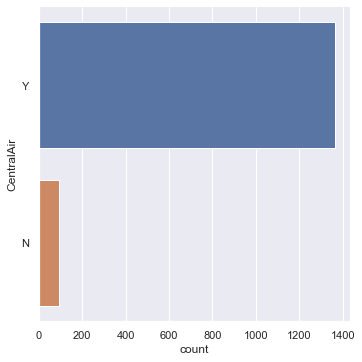

In [86]:
sb.catplot(y = 'CentralAir', data = trndata, kind = "count")

In [87]:
# Prof ans
countY, countX = trndata.CentralAir.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  1365 : 95


In [88]:
# My ans

SP = pd.DataFrame(trndata['SalePrice'])  # Predictor
CA = pd.DataFrame(trndata['CentralAir']) # Response


In [89]:
Y = CA[CA == 'Y']
N = CA[CA == 'N']
Y.count()

CentralAir    1365
dtype: int64

In [90]:
N.count()

CentralAir    95
dtype: int64

In [91]:
print("ratio of Y : N is 1365 : 95")

ratio of Y : N is 1365 : 95


### Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

<AxesSubplot:>

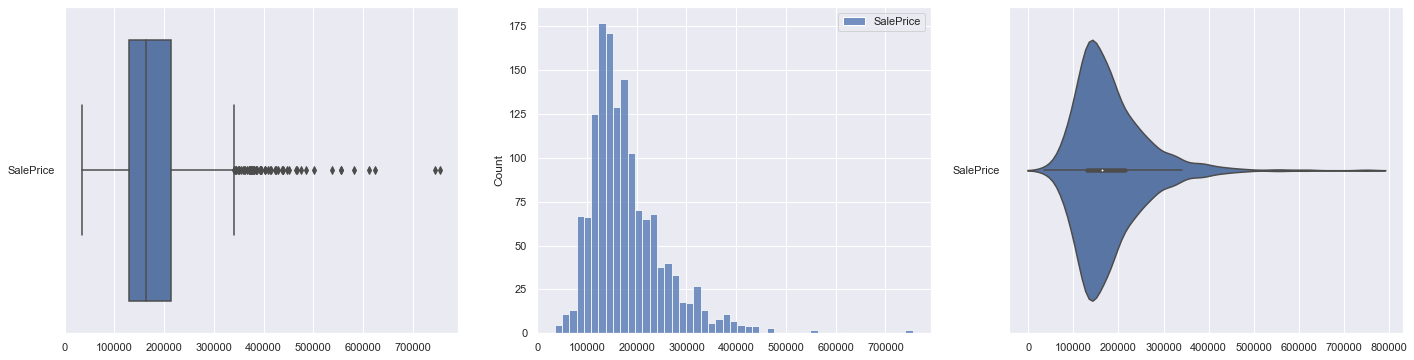

In [92]:
#Distributions of SalePrice
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = SP, orient = "h", ax = axes[0])
sb.histplot(data = SP, ax = axes[1])
sb.violinplot(data = SP, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

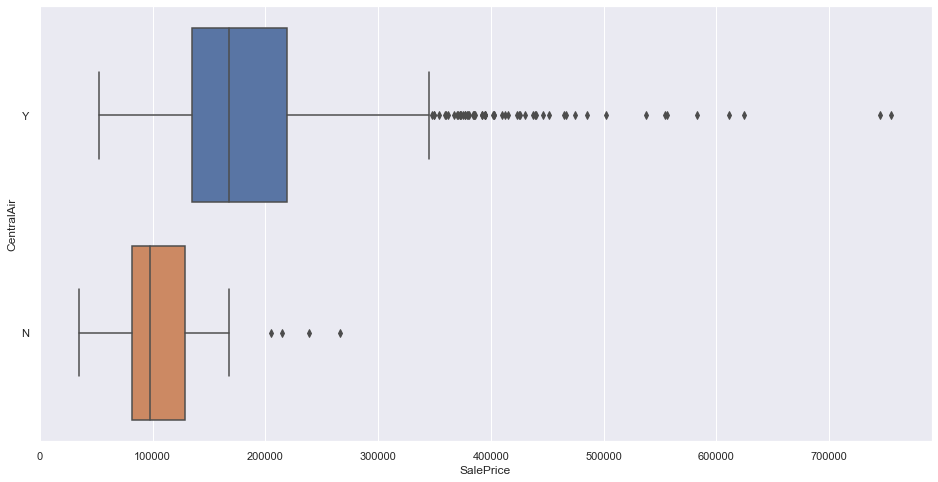

In [93]:
# Create a joint dataframe by concatenating SP and CA
trainDF = pd.concat([CA, SP], axis = 1).reindex(CA.index)

# Joint Boxplot of CA against SP
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

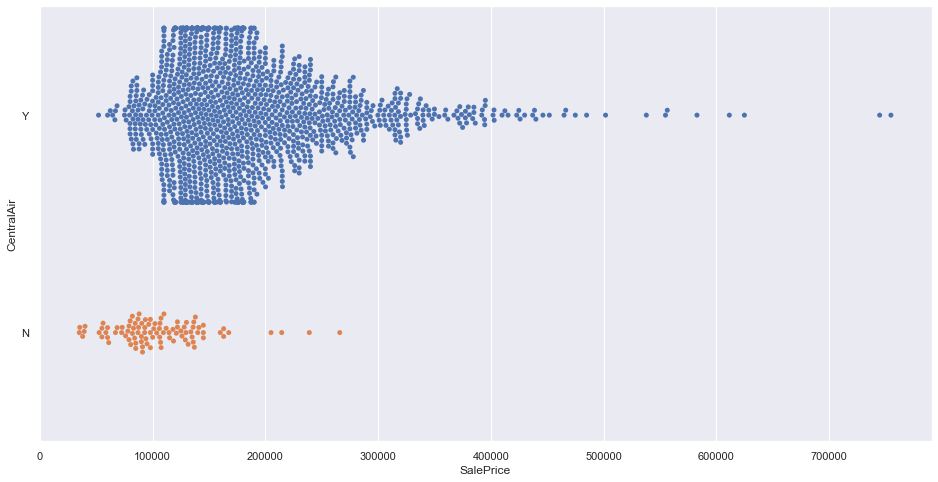

In [94]:
# Joint Swarmplot of CA against SP
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

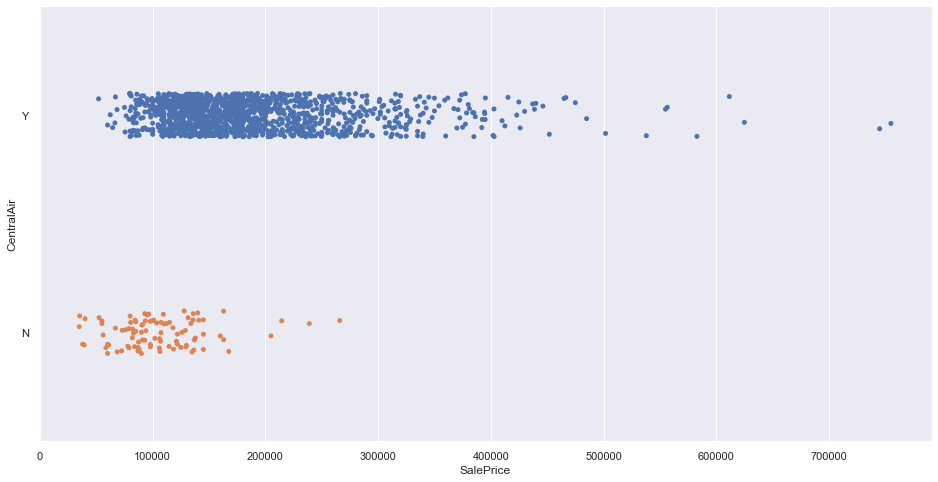

In [95]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'SalePrice', y = 'CentralAir', data = trndata)

### Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression
### Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [96]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish
dectree = DecisionTreeClassifier(max_depth = 2) # create the decision tree object

In [97]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Legendary-Total Dataset into Train and Test
SP_train, SP_test, CA_train, CA_test = train_test_split(SP, CA, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", SP_train.shape, CA_train.shape)
print("Test Set  :", SP_test.shape, CA_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.
Page 2

f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [98]:
# Decision Tree using Train Data
dectree.fit(SP_train, CA_train)                    # train the decision tree model

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(SP_train, CA_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(SP_test, CA_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9454545454545454

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9305555555555556



[Text(334.8, 543.6, 'SalePrice <= 107450.0\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = CentralAir'),
 Text(167.4, 326.16, 'SalePrice <= 79250.0\ngini = 0.477\nsamples = 107\nvalue = [42, 65]\nclass = CentralAir'),
 Text(83.7, 108.72000000000003, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = Ordinary'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.411\nsamples = 83\nvalue = [24, 59]\nclass = CentralAir'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.059\nsamples = 993\nvalue = [30, 963]\nclass = CentralAir'),
 Text(418.5, 108.72000000000003, 'gini = 0.133\nsamples = 321\nvalue = [23, 298]\nclass = CentralAir'),
 Text(585.9, 108.72000000000003, 'gini = 0.021\nsamples = 672\nvalue = [7, 665]\nclass = CentralAir')]

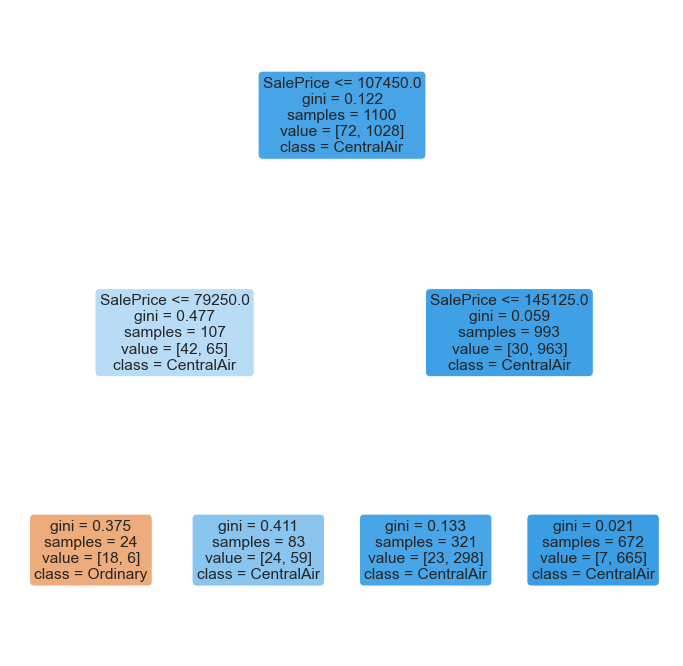

In [99]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Ordinary","CentralAir"])

<AxesSubplot:>

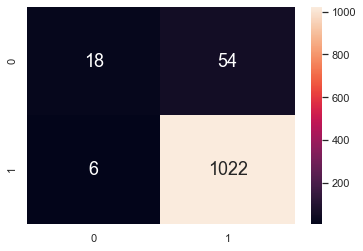

In [100]:
# Predict Legendary values corresponding to Total
CA_train_pred = dectree.predict(SP_train)
CA_test_pred = dectree.predict(SP_test)

# Plot the Confusion Matrix for Train
f = plt.plot(figsize=(12, 4))
sb.heatmap(confusion_matrix(CA_train, CA_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [101]:
cm_arr = confusion_matrix(CA_train,CA_train_pred)
tn_tr, fp_tr, fn_tr, tp_tr = cm_arr[0][0],cm_arr[0][1],cm_arr[1][0],cm_arr[1][1]
print(cm_arr)

[[  18   54]
 [   6 1022]]


Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [102]:
#accuracy
train_tr_neg = tn_tr/(tn_tr+fp_tr)
train_fa_pos = (fp_tr/(tn_tr+fp_tr))
train_fa_neg = (fn_tr/(fn_tr+tp_tr))
train_tr_pos = (tp_tr/(fn_tr+tp_tr))
train_acc = (tp_tr+tn_tr)/1100
train_inacc = 1 - train_acc

In [103]:
acc = {'class_acc': ['tr_neg', 'fa_pos', 'fa_neg','tr_pos', 'acc', 'inacc'], 'train': [train_tr_neg, train_fa_pos, train_fa_neg,train_tr_pos, train_acc, train_inacc]}
accdf = pd.DataFrame(data=acc)
accdf


,class_acc,train
0,tr_neg,0.250000
1,fa_pos,0.750000
2,fa_neg,0.005837
3,tr_pos,0.994163
4,acc,0.945455
5,inacc,0.054545


<AxesSubplot:>

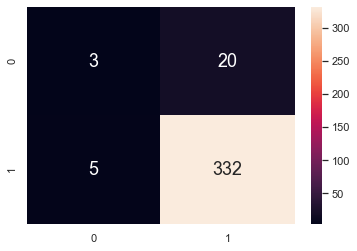

In [104]:
# Plot the Confusion Matrix for Train
f = plt.plot(figsize=(12, 4))
sb.heatmap(confusion_matrix(CA_test, CA_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [105]:
cm_arr = confusion_matrix(CA_test,CA_test_pred)
tn_test, fp_test, fn_test, tp_test = cm_arr[0][0],cm_arr[0][1],cm_arr[1][0],cm_arr[1][1]
print(cm_arr)

[[  3  20]
 [  5 332]]


In [106]:
#accuracy
test_tr_neg = tn_tr/(tn_tr+fp_tr)
test_fa_pos = (fp_tr/(tn_tr+fp_tr))
test_fa_neg = (fn_tr/(fn_tr+tp_tr))
test_tr_pos = (tp_tr/(fn_tr+tp_tr))
test_acc = (tp_tr+tn_tr)/360
test_inacc = 1 - train_acc

In [107]:
acc = {'class_acc': ['false_neg', 'false_pos', 'true_neg', 'true_pos', 'acc', 'inacc'], 'train':[train_tr_neg, train_fa_pos, train_fa_neg,train_tr_pos, train_acc, train_inacc],'test':[test_tr_neg, test_fa_pos, test_fa_neg, test_tr_pos, test_acc, test_inacc]}
accdf = pd.DataFrame(data=acc)
accdf

,class_acc,train,test
0,false_neg,0.250000,0.250000
1,false_pos,0.750000,0.750000
2,true_neg,0.005837,0.005837
3,true_pos,0.994163,0.994163
4,acc,0.945455,2.888889
5,inacc,0.054545,0.054545


## GLA

<AxesSubplot:>

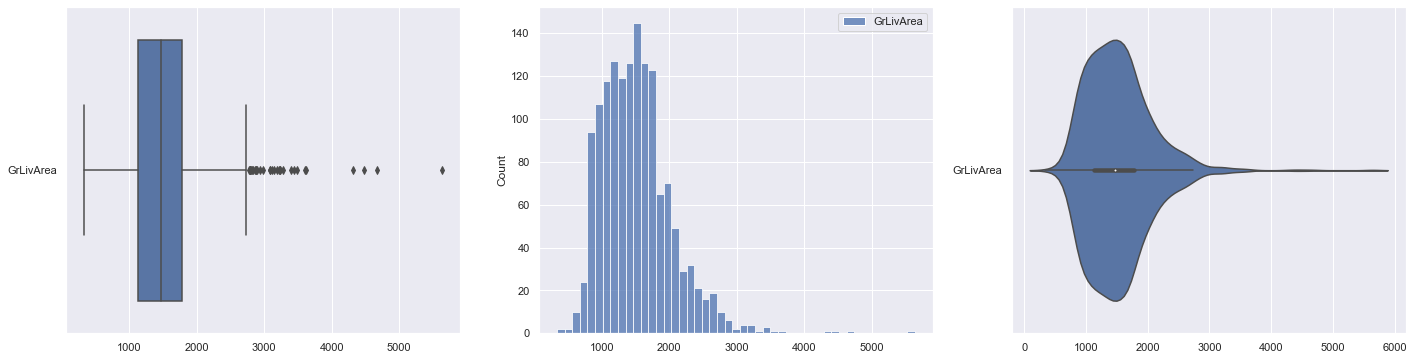

In [108]:
GL = pd.DataFrame(trndata['GrLivArea'])  # Predictor

#Distributions
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = GL, orient = "h", ax = axes[0])
sb.histplot(data = GL, ax = axes[1])
sb.violinplot(data = GL, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

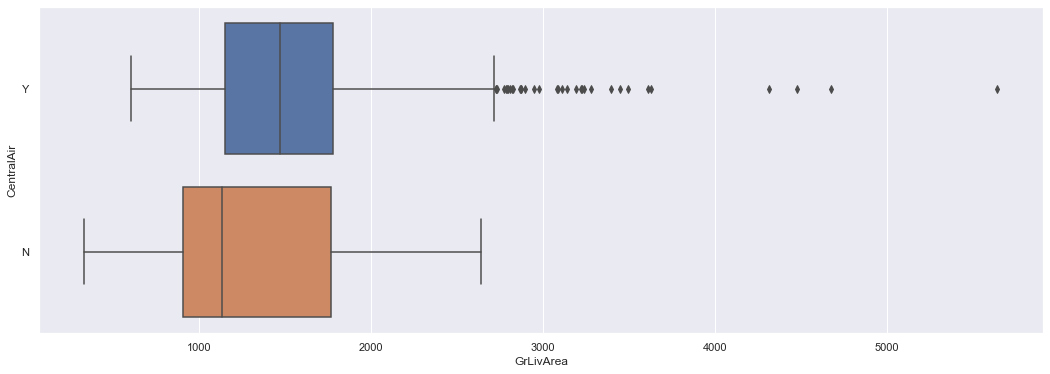

In [109]:
# Create a joint dataframe
trainDF = pd.concat([CA, GL], axis = 1).reindex(CA.index)

# Joint Boxplot 
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = trainDF, orient = "h")

In [110]:
#train and test data set
GL_train, GL_test, CA_train, CA_test = train_test_split(GL, CA, test_size = 360/1460)

In [111]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(GL_train, CA_train)                    # train the decision tree model

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(GL_train, CA_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(GL_test, CA_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409090909090909

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9277777777777778



[Text(267.84000000000003, 543.6, 'GrLivArea <= 568.0\ngini = 0.114\nsamples = 1100\nvalue = [67, 1033]\nclass = CentralAir'),
 Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Ordinary'),
 Text(401.76000000000005, 326.16, 'GrLivArea <= 1045.5\ngini = 0.111\nsamples = 1098\nvalue = [65, 1033]\nclass = CentralAir'),
 Text(267.84000000000003, 108.72000000000003, 'gini = 0.221\nsamples = 198\nvalue = [25, 173]\nclass = CentralAir'),
 Text(535.6800000000001, 108.72000000000003, 'gini = 0.085\nsamples = 900\nvalue = [40, 860]\nclass = CentralAir')]

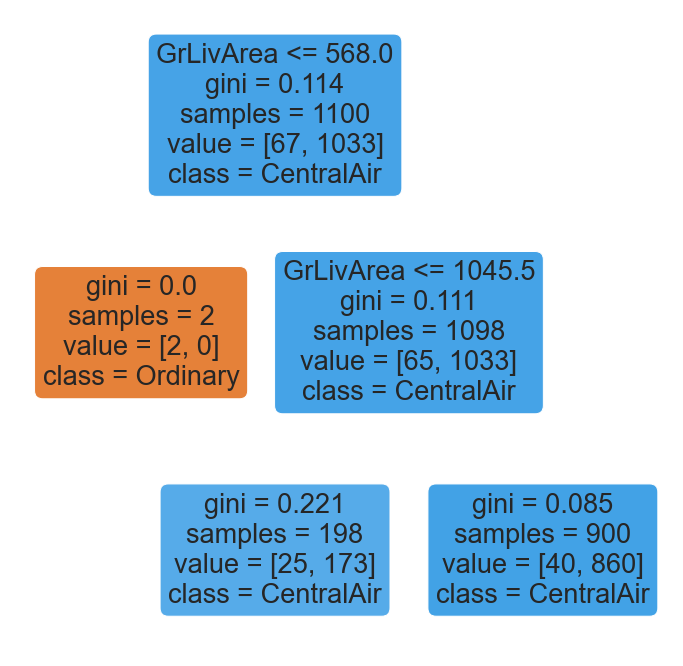

In [112]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["Ordinary","CentralAir"])

<AxesSubplot:>

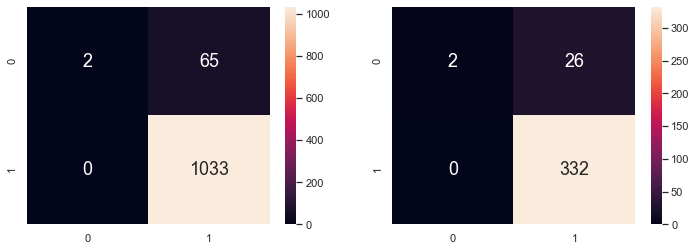

In [113]:
# Predict values
CA_train_pred = dectree.predict(GL_train)
CA_test_pred = dectree.predict(GL_test)

# Plot the Confusion Matrix 
f,axes = plt.subplots(1,2, figsize=(12, 4))
sb.heatmap(confusion_matrix(CA_train, CA_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(CA_test, CA_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [114]:
cm_arr = confusion_matrix(CA_train,CA_train_pred)
tn_tr, fp_tr, fn_tr, tp_tr = cm_arr[0][0],cm_arr[0][1],cm_arr[1][0],cm_arr[1][1]
print(cm_arr)

#accuracy
train_tr_neg = tn_tr/1100
train_fa_pos = (fp_tr/(tn_tr+fp_tr))
train_fa_neg = (fn_tr/(fn_tr+tp_tr))
train_tr_pos = (tp_tr/1100)
train_acc = (tp_tr+tn_tr)/1100
train_inacc = 1 - train_acc

cm_arr = confusion_matrix(CA_test,CA_test_pred)
tn_test, fp_test, fn_test, tp_test = cm_arr[0][0],cm_arr[0][1],cm_arr[1][0],cm_arr[1][1]
print(cm_arr)

# data
test_tr_neg = tn_test/360
test_fa_pos = (fp_test/(fp_test+tn_test))
test_fa_neg = (fn_test/(fn_test+tp_test))
test_tr_pos = (tp_test/360)
test_acc = (tp_test+tn_test)/360
test_inacc = 1 - test_acc

[[   2   65]
 [   0 1033]]
[[  2  26]
 [  0 332]]


In [115]:
acc = {'class_acc': ['false_neg', 'false_pos', 'true_neg', 'true_pos', 'acc', 'inacc'], 'train':[train_tr_neg, train_fa_pos, train_fa_neg,train_tr_pos, train_acc, train_inacc],'test':[test_tr_neg, test_fa_pos, test_fa_neg, test_tr_pos, test_acc, test_inacc]}
accdf2 = pd.DataFrame(data=acc)
accdf2

,class_acc,train,test
0,false_neg,0.001818,0.005556
1,false_pos,0.970149,0.928571
2,true_neg,0.000000,0.000000
3,true_pos,0.939091,0.922222
4,acc,0.940909,0.927778
5,inacc,0.059091,0.072222


## Problem 3 : Comparing the Uni-Variate Decision Tree Models

Compare and contrast the four models in terms of Classification Accuracy, TPR and FPR on both Train and Test Data.

* `CentralAir` vs `SalePrice` has the highest Training Accuracy out of the four models.
* `CentralAir` vs `GrLivArea` has the highest Test Accuracy out of the four models.
* However, the train and test accuracy for all four models are pretty high and quite close.
* So, it is not easy to justify which model is better just using their classification accuracy.


However, if we look at the True Positive Rate (TPR) and False Positive Rate (FPR) of the four models, we find that

* `YearBuilt` yields a TPR of 1 (best-case) but an FPR of 1 (worst-case) on both Train and Test data. Really bad for prediction.
* `GrLivArea` yields a TPR of close to 1 (best-case) but an FPR of close to 1 (worst-case) on Train and Test set, not good either.
* `SalePrice` and `OverallQual` yield the best TPR (high) vs FPR (not-as-high) trade-off in case of both Train and Test data.

Overall, the predictor `OverallQual` is the best amongst the four in predicting `CentralAir`, while `SalePrice` is a close second as per the models above. `YearBuilt` is definitely the worst predictor out of these four variables, with `GrLivArea` not doing so well either, given the models above.

**Did you notice?** : Go back and check again all accuracy figures for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of accuracy figures. If that is so, can we really be confident that `OverallQual` will always be the best variable to predict `CentralAir`? Think about it. ;-)

---

## Extra : Predicting CentralAir using All Variables

Use all the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.   

In [116]:
# Extract Response and Predictors
y = pd.DataFrame(trndata['CentralAir'])
X = pd.DataFrame(trndata[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'SalePrice <= 107750.0\ngini = 0.118\nsamples = 1100\nvalue = [69, 1031]\nclass = Y'),
 Text(334.8, 652.32, 'YearBuilt <= 1953.5\ngini = 0.47\nsamples = 114\nvalue = [43, 71]\nclass = Y'),
 Text(167.4, 217.44000000000005, 'gini = 0.499\nsamples = 78\nvalue = [41, 37]\nclass = N'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.105\nsamples = 36\nvalue = [2, 34]\nclass = Y'),
 Text(1004.4000000000001, 652.32, 'YearBuilt <= 1919.5\ngini = 0.051\nsamples = 986\nvalue = [26, 960]\nclass = Y'),
 Text(837.0, 217.44000000000005, 'gini = 0.435\nsamples = 50\nvalue = [16, 34]\nclass = Y'),
 Text(1171.8, 217.44000000000005, 'gini = 0.021\nsamples = 936\nvalue = [10, 926]\nclass = Y')]

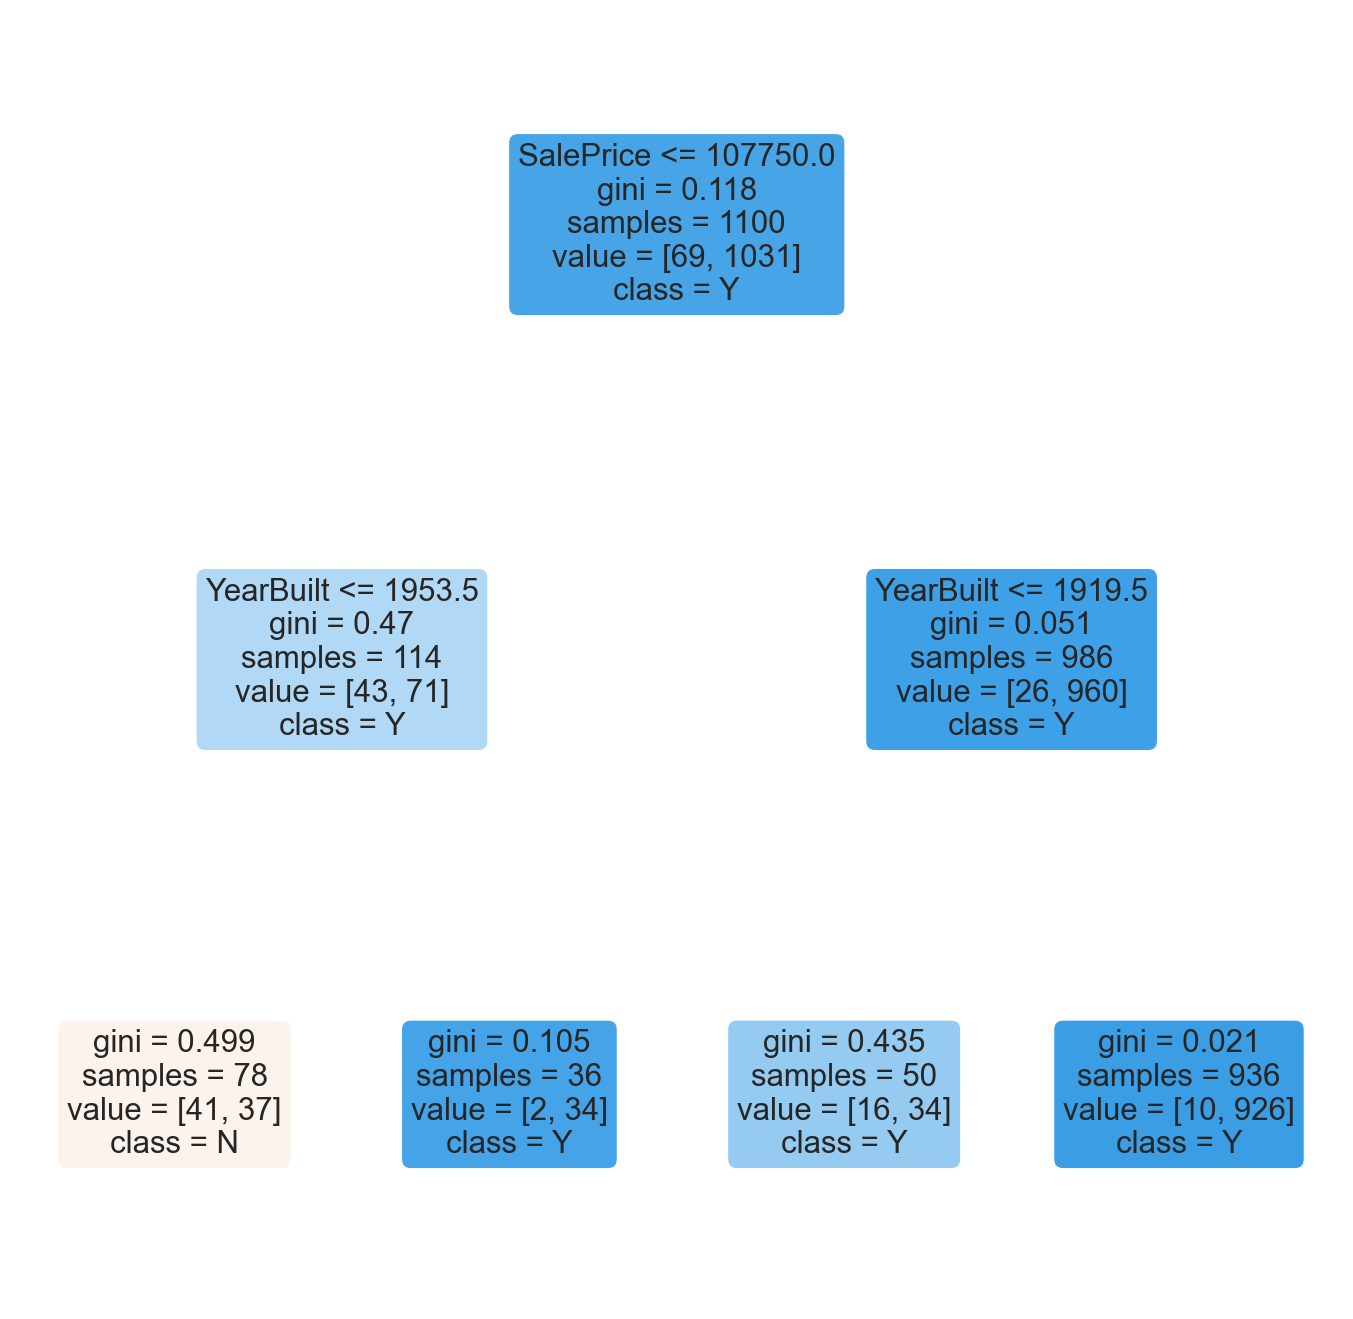

In [117]:
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9409090909090909

TPR Train :	 0.9641125121241513
TNR Train :	 0.5942028985507246

FPR Train :	 0.4057971014492754
FNR Train :	 0.03588748787584869


<AxesSubplot:>

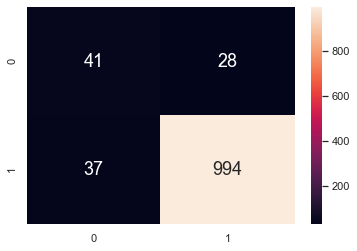

In [118]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9222222222222223

TPR Test :	 0.9520958083832335
TNR Test :	 0.5384615384615384

FPR Test :	 0.46153846153846156
FNR Test :	 0.04790419161676647


<AxesSubplot:>

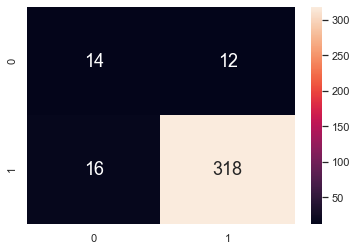

In [119]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Observation :** The model with `CentralAir` against all the four variables `SalePrice`, `GrLivArea`, `OverallQual`, `YearBuilt` is not necessarily better. That's strange! However, there is also room to play with the `max_depth` of the Decision Tree. Try other values and check out for yourself. :-)

Experiment with `max_depth` of the Decision Tree to check the variations in accuracy and confusion matrix for train and test. Think about it!

[Text(589.248, 1174.1760000000002, 'SalePrice <= 107700.0\ngini = 0.114\nsamples = 1100\nvalue = [67, 1033]\nclass = Y'),
 Text(267.84000000000003, 913.248, 'YearBuilt <= 1953.5\ngini = 0.444\nsamples = 117\nvalue = [39, 78]\nclass = Y'),
 Text(107.13600000000001, 652.3200000000002, 'SalePrice <= 62750.0\ngini = 0.496\nsamples = 81\nvalue = [37, 44]\nclass = Y'),
 Text(53.568000000000005, 391.39200000000005, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = N'),
 Text(160.704, 391.39200000000005, 'GrLivArea <= 1524.0\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Y'),
 Text(107.13600000000001, 130.46400000000017, 'gini = 0.444\nsamples = 63\nvalue = [21, 42]\nclass = Y'),
 Text(214.27200000000002, 130.46400000000017, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = N'),
 Text(428.54400000000004, 652.3200000000002, 'GrLivArea <= 1537.5\ngini = 0.105\nsamples = 36\nvalue = [2, 34]\nclass = Y'),
 Text(374.97600000000006, 391.39200000000005, 'YearBuilt <= 1957.5\ngini = 0.056\ns

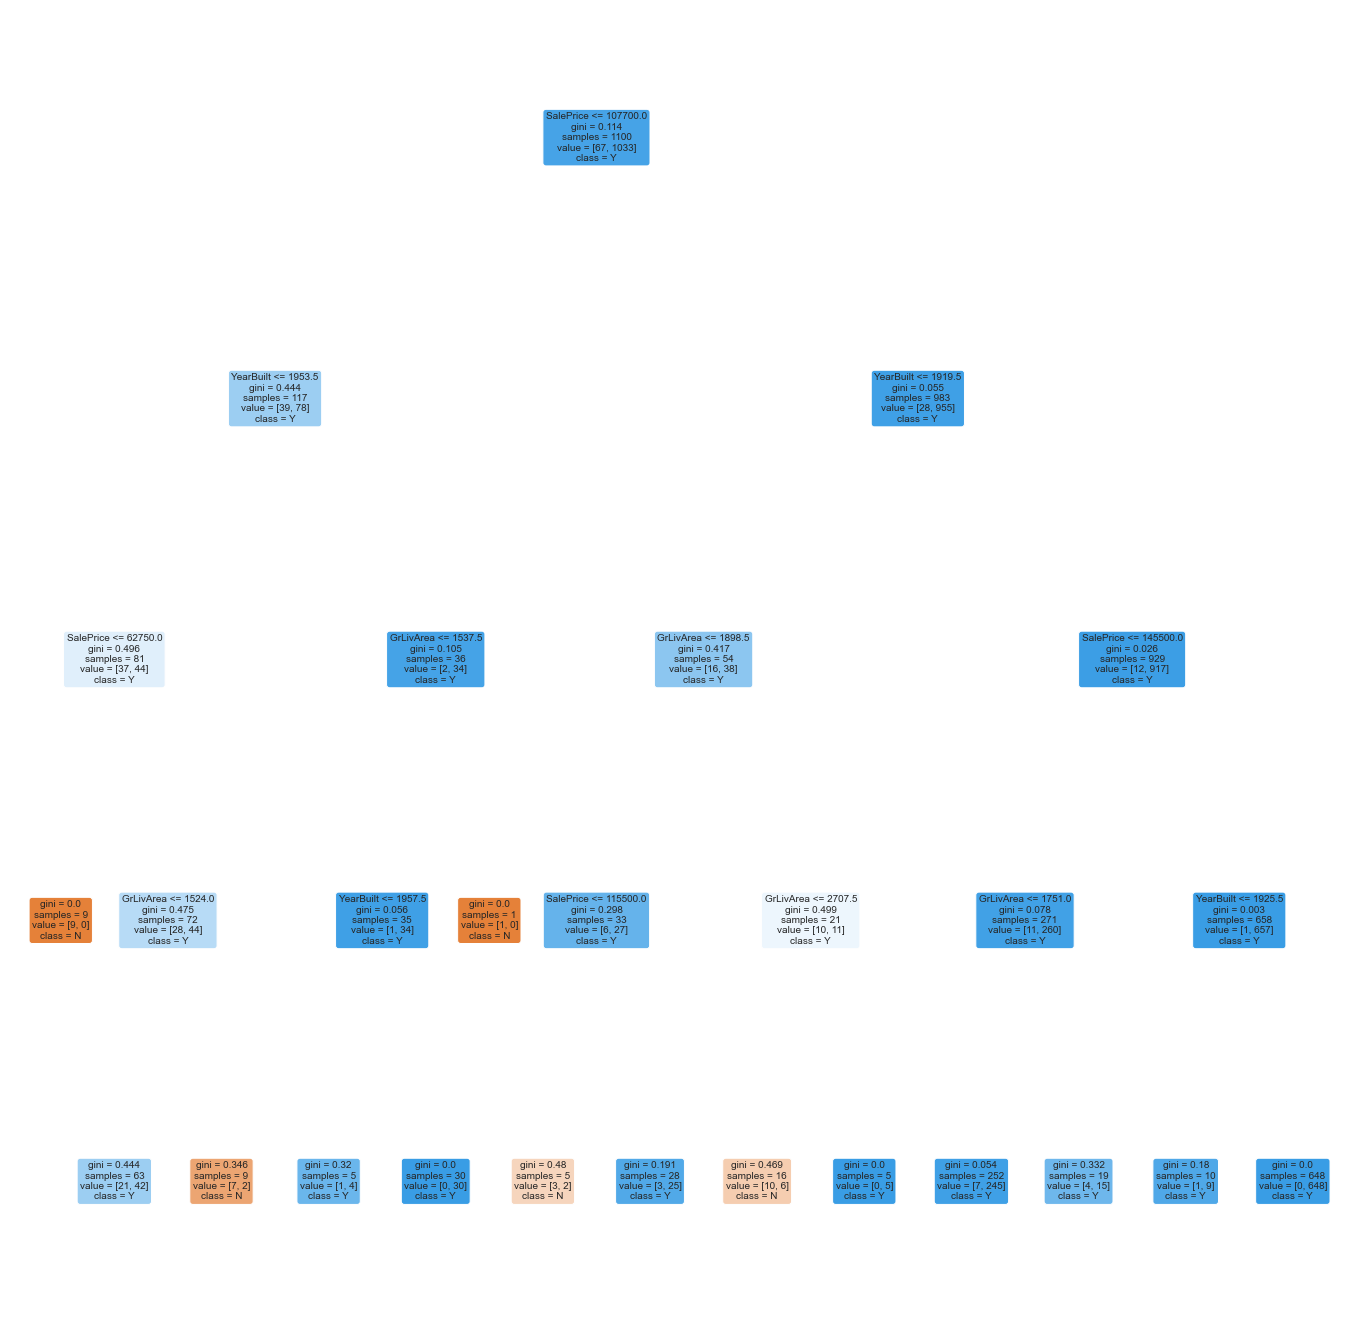

In [120]:
# Extract Response and Predictors
y = pd.DataFrame(trndata['CentralAir'])
X = pd.DataFrame(trndata[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # CHANGE IT HERE AND EXPERIMENT
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9572727272727273

TPR Train :	 0.9903194578896418
TNR Train :	 0.44776119402985076

FPR Train :	 0.5522388059701493
FNR Train :	 0.00968054211035818


<AxesSubplot:>

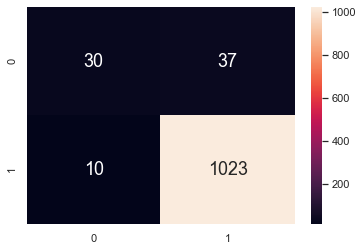

In [121]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9305555555555556

TPR Test :	 0.9879518072289156
TNR Test :	 0.25

FPR Test :	 0.75
FNR Test :	 0.012048192771084338


<AxesSubplot:>

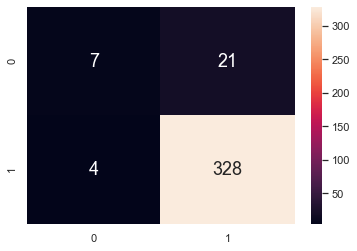

In [122]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})